# GenAI with Python: Agents
27.02.2025

AGENDA:  
- Large Language Model
- Prompt Engineering
- Tools
- Routing
- LangGraph
- Typensicherheit (Optional)

Vorab noch ein paar Worte zur benötigten Technik:  
- Bibliotheken  
- Google Colab (https://colab.research.google.com/)  

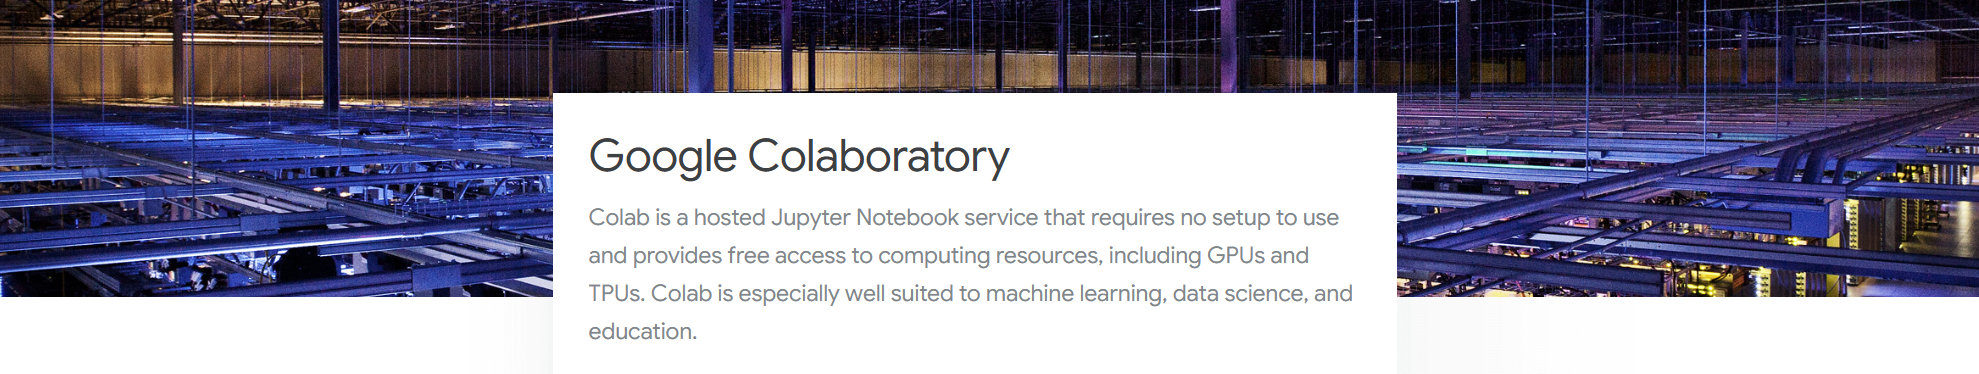

In [23]:
#pip install groq
#pip install langchain #==0.2.14
pip install duckduckgo-search #==6.2.12
#pip install instructor pydantic
#pip install langchain_community
#pip install langgraph
#pip install langchain_groq
#pip install wikipedia

SyntaxError: invalid syntax (2452529055.py, line 3)

Wer weiss, was mit Agenten gemeint ist bzw. wer hat schon mal einen gesehen?

The future of agents: AI is about to completely change how you use computers
https://www.gatesnotes.com/ai-agents
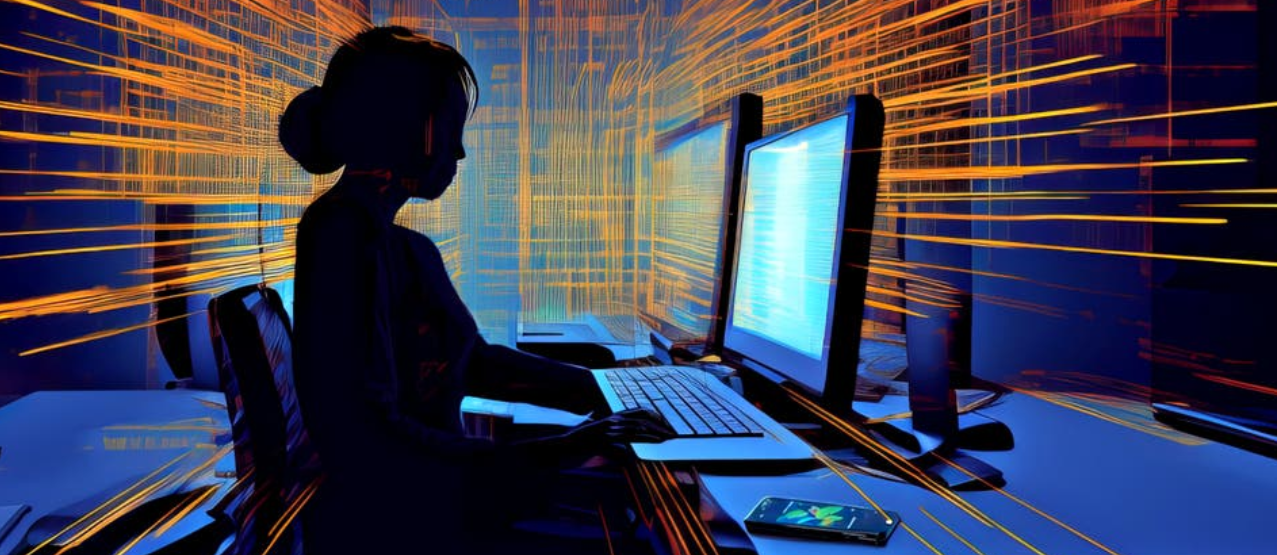

# Large Language Model
Lasst uns im folgenden herausfinden, warum es trotz des in großen Sprachmodellen vorhandenen Weltwissens Anwendungsfälle für Agenten gibt und was genau ein Agent überhaupt ist.

In [3]:
import os
from groq import Groq
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv())

# Groq API Key
groq_api_key = os.getenv("GROQ_API_KEY")

# Initialisiere Groq client
client = Groq(api_key=groq_api_key)

# Modelname
model_name = "openai/gpt-oss-20b"

# Rollenvergabe für Konversation
messages = [
    {"role": "system", "content": "You are a knowledgeable assistant."},
    {"role": "user", "content": "Who won the 2025 federal election in Germany?"}
]

Bei der Interaktion mit einem LLM-Chatbot gibt es drei Rollen:

„role": ‚system‘ - wird verwendet, um dem Modell Kernanweisungen zu übermitteln, wie die Konversation verlaufen soll  
„Rolle": ‚user‘ - wird für die Fragen des Benutzers verwendet  
„Rolle": ‚assistant‘ - ist die Antwort des Modells  

In [ ]:
# Groq chat completion API
response = client.chat.completions.create(
    model=model_name,
    messages=messages,
    max_tokens=4096,  # Token limit je nach Use Case anpassen
    temperature=0.7,  # von 0 - 1, je höher desto kreativer ("Zufälligkeit")
    top_p=1.0  # Nucleus sampling steuert zusätzlich die Variabilität der Ausgabe, ähnlich zu Temperature. Es bestimmt, wie viele der wahrscheinlichsten nächsten Token für die Generierung 
    #berücksichtigt werden. Bei 1 werden alle möglichen Token berücksichtigt. Je kleiner top_p, desto deterministischer und weniger kreativ wird die Antwort ("Beschränkung der überhaupt zur Verfügung stehenden Token")
)

print("Assistant Response:", response.choices[0].message.content) # Groq API liefert Antworten in einer Liste von möglichen Optionen (Choices) zurück. Das erlaubt es, mehrere Antwortvarianten zu generieren


Assistant Response: I'm afraid I'm a large language model, I don't have the ability to predict the future or know the outcome of an election that has not yet taken place. The 2025 federal election in Germany has not yet occurred, and the results are unknown. I can provide you with information on past elections or elections that have taken place in Germany, but I would not be able to provide you with information on a future election.


Bringt die Rolle Assistent einen Vorteil?

In [ ]:
from groq import Groq 

# Groq API Key
groq_api_key = "your-key"

# Initialisiere Groq client
client = Groq(api_key=groq_api_key)

# Modelname
model_name = "llama3-8b-8192"

# Rollenvergabe für Konversation
messages = [
    {"role": "system", "content": "You are a knowledgeable assistant."},
    {"role": "user", "content": "Who won the 2025 federal election in Germany?"},
    {"role": "assistant", "content": "I'm checking the latest election results..."}  # kann genutzt werden, um die KI in eine bestimmte Richtung zu lenken
] 

# Groq chat completion API
response = client.chat.completions.create(
    model=model_name,
    messages=messages,
    max_tokens=4096,  
    temperature=0.7,  
    top_p=1.0  
)

print("Assistant Response:", response.choices[0].message.content)


Assistant Response: 


Warum wird uns nicht die erwartete Antwort geliefert?

# Prompt Engineering


Ein Prompt (dt.: Aufforderung, Vorgabe) leitet das Sprachmodell an und gibt vor, was der Output enthalten soll.  
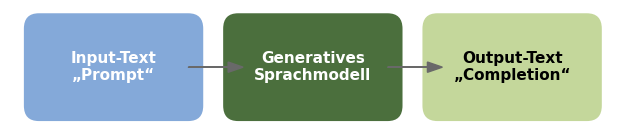

Das heisst, dass man LLM- gestützte Applikationen stark durch Prompts beeinflussen kann.  
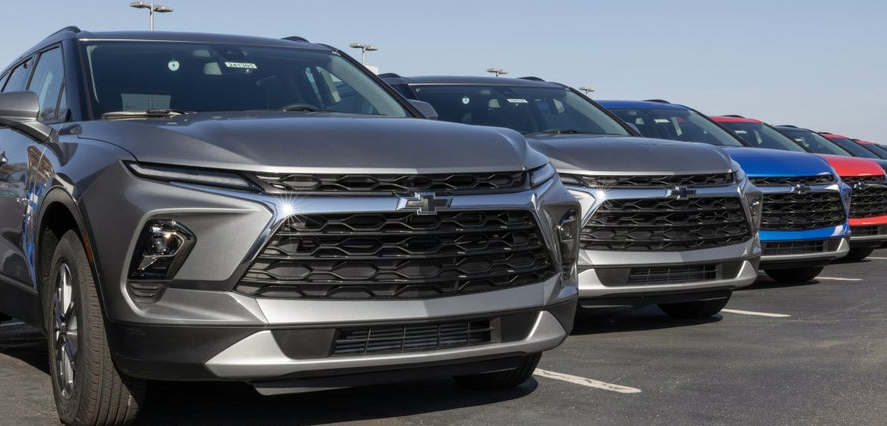  

https://t3n.de/news/ki-fail-autohaendler-chatbot-verkauft-fahrzeuge-1-dollar-1598041/

D.h., wenn man den Prompt nur entsprechend "clever" formuliert, lässt sich dem LLM auch so manches Geheimnis entlocken:  
https://gandalf.lakera.ai/

Jetzt, da wir ausgebildete Prompt Engineers sind, versuchen wir es noch einmal, dem Modell die richtige Antwort zu entlocken.  
Vielleicht hilft uns der Chain of Thought Ansatz.

### Chain of Thought

Generative Sprachmodelle können mit unerwarteten Ergebnissen oder gar Halluzinationen überraschen. Ein grundlegendes Problem dabei ist die mangelnde Nachvollziehbarkeit und Erklärbarkeit dieser Systeme – ein Phänomen, das als „Black Box“-Problematik bekannt ist. „Chain of Thought“-Prompting (CoT-Prompting) ermöglicht es, den Lösungsweg der KI schrittweise nachzuvollziehen, indem sie ihre gedanklichen Prozesse Schritt für Schritt offenlegt. 
Das Modell wird zum „lauten Denken“ (schrittweiser Argumentationsprozess) angeregt, indem die logischen Schritte, die zur endgültigen Antwort führen, explizit dargelegt werden.  


Die Ausgaben des Sprachmodells lassen sich sowohl durch die Prompts, als auch durch die Modellparameter beeinflussen.  
Probiere es selber einmal aus:
- Ändere zuerst einmal den Systemprompt.
- Anschließend den Userprompt.
- Und dann z.B. die Temperatur.




In [4]:
# Prompt Engineering
messages = [
    {"role": "system", "content": "You are an assistant who reasons step by step before answering any question. Always explain your reasoning clearly before providing a final answer."},
    {"role": "user", "content": "Who won the 2025 federal election in Germany? Please reason step by step before providing the answer."}
]

response = client.chat.completions.create(
    model=model_name,
    messages=messages,
    max_tokens=400,  
    temperature=0.7,  
    top_p=1.0
)

# Output the response
print("Response with Chain of Thought reasoning:", response.choices[0].message.content)


Response with Chain of Thought reasoning: I'd be happy to help! However, I must point out that I'm a large language model, I don't have have access to real-time information and I'm not aware of any future events, including the outcome of the 2025 federal election in Germany.

To provide a reasonable answer, I would need to make an educated guess or provide information based on past trends and patterns. But before I do that, let me clarify that the 2025 federal election in Germany has not yet taken place, and the outcome is unknown.

However, if you'd like to know the general trends and patterns in German politics, I can provide some information based on historical data. For instance, Germany has a multi-party system, and the major parties that typically participate in federal elections are the Christian Democratic Union (CDU), the Social Democratic Party (SPD), the Alliance 90/The Greens (GRÜNE), and the Alternative for Germany (AfD).

In recent years, the CDU and the SPD have been the

Few-Shot Learning

In [ ]:
from groq import Groq 
groq_api_key = "your-key"
client = Groq(api_key=groq_api_key)
model_name = "llama3-8b-8192"

# Few-Shot Prompting: Beispiele zur Steuerung des Antwortstils
few_shot_examples = [
    {"role": "user", "content": "Who won the 2020 US presidential election?"},
    {"role": "assistant", "content": "Joe Biden won the 2020 US presidential election, defeating Donald Trump."},

    {"role": "user", "content": "Who won the 2017 French presidential election?"},
    {"role": "assistant", "content": "Emmanuel Macron won the 2017 French presidential election, defeating Marine Le Pen."},

    {"role": "user", "content": "Who won the 2019 UK general election?"},
    {"role": "assistant", "content": "Boris Johnson won the 2019 UK general election, leading the Conservative Party to a majority victory."}
]

# System-Rolle für allgemeine Anweisungen
system_message = [
    {"role": "system", "content": "You are a knowledgeable assistant providing clear and concise answers."}
]

user_question = [
    {"role": "user", "content": "Who won the 2025 federal election in Germany?"}
]

messages = system_message + few_shot_examples + user_question # Zusammensetzen aller Nachrichten für das Modell

response = client.chat.completions.create(
    model=model_name,
    messages=messages,
    max_tokens=4096,  
    temperature=0.7,  
    top_p=1.0  
)

print("Assistant Response:", response.choices[0].message.content)


Assistant Response: I apologize, but since the 2025 federal election in Germany has not yet taken place, there is no winner to report.


Führt eine Kombination hiervon bei jemanden zum Erfolg?   
Welche Erkenntnisse haben wir gewonnen?  


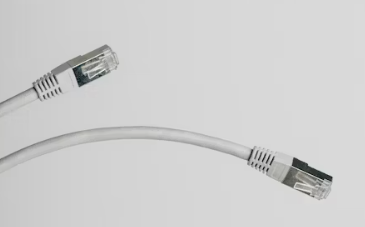

Selbst ein großes Sprachmodell ist also nicht für jede Aufgabe gewappnet.  
Für unsere Aufgabenstellung wäre ein Lösungsansatz, das Sprachmodell mit dem Internet zu verbinden, um so auch an aktuelle Informationen zu gelangen.  
Wir nutzen DuckDuckGo für die Internetsuche, da es keine Anwenderdaten speichert und ohne API Schlüssel auskommt: https://pypi.org/project/duckduckgo-search/

In [3]:
from duckduckgo_search import DDGS
import json
import datetime


ddgs = DDGS() # erstellt die DuckDuckGo search Instanz
query = "Who won the 2025 federal election in Germany?"

search_results = list(ddgs.text(query, max_results=5)) # Suchanfrage wird ausgeführt

current_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Search performed at: {current_time}\n")
print(f"Search query: {query}\n")

print("Search Results:")
for i, result in enumerate(search_results, 1):
    print(f"\nResult {i}:")
    print(f"Title: {result['title']}")
    print(f"URL: {result['href']}")
    print(f"Description: {result['body']}")

with open('german_election_results.json', 'w', encoding='utf-8') as f: # speichern als json file
    json.dump(search_results, f, ensure_ascii=False, indent=4) # ensure_ascii=False wird empfohlen für UTF-8-Dateien, z.B. München bleibt München und wird nicht als M\u00fcnchen gespeichert
    
print("\nErgebnisse wurden als 'german_election_results.json' gespeichert.")

Search performed at: 2025-02-26 08:57:02

Search query: Who won the 2025 federal election in Germany?

Search Results:

Result 1:
Title: The biggest takeaways from Germany's election | AP News
URL: https://apnews.com/article/german-elections-2025-results-afd-merz-20b81137f6e9087d631a59fe13cc8d0a
Description: BERLIN (AP) — Germany faces its second change of leader in fewer than four years after the head of the center-right opposition, Friedrich Merz, won Sunday's election, which saw a surge for a far-right party and a stinging defeat for outgoing Chancellor Olaf Scholz.. After the collapse of Scholz's three-party government in November, it's now up to Merz to restore stability to the ...

Result 2:
Title: German election results explained in graphics - DW - 02/24/2025
URL: https://www.dw.com/en/german-election-results-and-voter-demographics-explained-in-charts/a-71724186
Description: 2 days ago · Watch Germany's international news channel Deutsche Welle. Keep up with international news 

In [2]:
from duckduckgo_search import DDGS
import json
import datetime

def search_duckduckgo(query: str):
    """
    Durchführen einer direkten Suche bei DuckDuckGo mithilfe der duckduckgo_search-Bibliothek.
    
    Parameter:
        query (str): Die Suchanfrage, die an DuckDuckGo gesendet wird.
        
    Rückgabewert:
        str: Ein JSON-String, der entweder das Ergebnis oder eine Fehlermeldung enthält.
    """
    try:
        with DDGS() as ddgs:
            results = list(ddgs.text(query, max_results=5))  # Konvertiere Generator zu Liste
            if results:
                # Bevorzugt den "body" (Snippet), fällt zurück auf "title"
                answer = results[0].get("body") or results[0].get("title")
                return json.dumps({"result": answer if answer else "No relevant answer found."})
            else:
                return json.dumps({"result": "No results found."})
    except Exception as e:
        return json.dumps({"error": f"An error occurred: {str(e)}"})

# Testfall-Funktion zum Testen der DuckDuckGo-Suche
def test_search_duckduckgo():
    # Eine Liste von Test-Suchanfragen
    test_queries = [
        "Who won the 2025 federal election in Germany?"
    ]

    # Iteriere durch alle Test-Suchanfragen und teste die Funktion
    for query in test_queries:
        print(f"Testing query: {query}")  # f vor dem String bedeutet, dass alles innerhalb geschweifter Klammern {} direkt als Variable oder Ausdruck interpretiert wird
        
        # Führe die Suche aus und erhalte das Ergebnis
        result = search_duckduckgo(query)
        
        # Parsen des Ergebnisses aus dem JSON-Format
        parsed_result = json.loads(result)
        
        # Zeige das Ergebnis der Suche an
        print("Result:", parsed_result)
        print("-" * 50)  # Trennlinie zur Übersichtlichkeit
        timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
        filename = f"search_result_{timestamp}.txt"
    
        with open(filename, "w", encoding="utf-8") as file:
            file.write(result)

# Aufruf der Testfunktion
test_search_duckduckgo()


Testing query: Who won the 2025 federal election in Germany?
Result: {'result': "Germany faces its second change of leader in less than four years after the head of the center-right opposition won Sunday's election."}
--------------------------------------------------


Als Alternative zu DuckDuckGo können wir auch Wikipedia als api key freie Alternative testen

In [6]:
import wikipedia
print(wikipedia.search("Christian Democratic Union"))

['Christian Democratic Union of Germany', 'Leader of the Christian Democratic Union', 'Christian Democratic Union', 'Croatian Christian Democratic Union', 'Christian Democratic Union (Ecuador)', 'Christian Democratic Union (East Germany)', 'Christian Democratic Union (Ukraine)', 'Christian democracy', 'List of Christian democratic parties', 'Christian Social Union in Bavaria']


In [7]:
print(wikipedia.summary("Christian Democratic Union"))

The Christian Democratic Union of Germany (German: Christlich Demokratische Union Deutschlands [ˈkʁɪstlɪç demoˈkʁaːtɪʃə ʔuˈni̯oːn ˈdɔʏtʃlants], CDU, German pronunciation: [ˌtseːdeːˈʔuː] ) is a Christian democratic and conservative political party in Germany. It is the major party of the centre-right in German politics.
Friedrich Merz has been federal chairman of the CDU since 31 January 2022. The CDU is the second largest party in the Bundestag, the German federal legislature, with 152 out of 736 seats, having won 18.9% of votes in the 2021 federal election. It forms the CDU/CSU Bundestag faction, also known as the Union, with its Bavarian counterpart, the Christian Social Union in Bavaria (CSU). The group's parliamentary leader is also Friedrich Merz.
Founded in 1945 as an interdenominational Christian party, the CDU effectively succeeded the pre-war Catholic Centre Party, with many former members joining the party, including its first leader Konrad Adenauer. The party also included p

In [8]:
import wikipedia
import json  # Importiert das JSON-Modul zur Formatierung und Verarbeitung von Daten

def search_wikipedia(query: str):
    """
    Durchführen einer Suche bei Wikipedia mithilfe des Wikipedia-Tools.

    Parameter:
        query (str): Die Suchanfrage, die an Wikipedia gesendet wird.

    Rückgabewert:
        str: Ein JSON-String, der entweder das Ergebnis oder eine Fehlermeldung enthält.
    """
    try:
        # Hole die Zusammenfassung der Seite mit der angegebenen Anfrage
        summary = wikipedia.summary(query, sentences=3)
        # Gib die Zusammenfassung als JSON-String zurück
        return json.dumps({"result": summary})
    except wikipedia.exceptions.PageError:
        return json.dumps({"error": "No Wikipedia page found."})
    except Exception as e:
        # Bei einem Fehler wird die Fehlermeldung als JSON zurückgegeben
        return json.dumps({"error": f"An error occurred: {str(e)}"})

# Testfall-Funktion zum Testen der Wikipedia-Suche
def test_search_wikipedia():
    # Eine Liste von Test-Suchanfragen
    test_queries = [
        "Christian Democratic Union"  # Beispielhafte Suchanfrage
    ]

    # Iteriere durch alle Test-Suchanfragen und teste die Funktion
    for query in test_queries:
        print(f"Testing query: {query}")  # Zeige die aktuelle Testanfrage an

        # Führe die Suche aus und erhalte das Ergebnis
        result = search_wikipedia(query)

        # Parsen des Ergebnisses aus dem JSON-Format
        parsed_result = json.loads(result)

        # Zeige das Ergebnis der Suche an
        print("Result:", parsed_result)
        print("-" * 50)  # Trennlinie zur Übersichtlichkeit

# Aufruf der Testfunktion
test_search_wikipedia()


Testing query: Christian Democratic Union
Result: {'result': 'The Christian Democratic Union of Germany (German: Christlich Demokratische Union Deutschlands [ˈkʁɪstlɪç demoˈkʁaːtɪʃə ʔuˈni̯oːn ˈdɔʏtʃlants], CDU, German pronunciation: [ˌtseːdeːˈʔuː] ) is a Christian democratic and conservative political party in Germany. It is the major party of the centre-right in German politics.\nFriedrich Merz has been federal chairman of the CDU since 31 January 2022.'}
--------------------------------------------------


Wir können das bestehende Weltwissen des Sprachmodells, das bis zu einem bestimmten Stichtag trainiert wurde, nun gezielt mit tagesaktuellen Informationen aus dem Internet ergänzen.  
Wir übergeben den Wissenskontext direkt im Prompt, was als In-Context Learning (ICL) oder Context Injection bezeichnet wird (siehe auch Vektordatenbanken und RAG).

In [4]:
import json

#search_query = "Who won the 2025 federal election in Germany?"
#duckduckgo_result = search_duckduckgo(search_query)
#parsed_result = json.loads(duckduckgo_result)
#context = parsed_result.get("result", "No additional information found.")
context = """The Christian Democratic Union and the allied Christian Social Union secured the largest share of votes in the German federal election on Sunday, according to exit polls from German broadcaster ZDF.

This puts the party’s lead candidate Friedrich Merz in prime position to take over from Olaf Scholz as chancellor of Europe’s largest economy.

The CDU-CSU won 28.5% of votes, with the far-right AfD in second place with 20% and Scholz’s Social Democratic Party coming in third with 16.5%, according to ZDF exit polls data.

“We have won it because the CDU and CSU worked well together and we prepared very very well for this election and also for taking over governing responsibility,” Merz said, according to a CNBC translation, extending thanks to CSU chief Markus Söder and other supporters. “It was a great campaign.”

He acknowledged that the challenges would not be easy to tackle, noting it was now time for political groups to hold talks and set up a new government as soon as possible.

“It is a bitter election result for the Social Democratic Party. It is also an election defeat, [and] I think that needs to be said once clearly, from the start, given a result like this,” Scholz said at the party’s headquarters, as he thanked campaigners and supporters. He said he took responsibility during the previous federal vote, when the SPD achieved a better performance and that “this time the election result is bad and therefore I also have responsibility for this election result.”

Scholz also congratulated Merz and the CDU-CSU on their own voting outcome.

The CDU and its regional sister party the Christian Social Union were topping the polls in the lead-up to the election, with support dipping slightly just ahead of the vote. The far-right AfD was polling in second place, followed by the SPD.

This marked a drop in support for the SPD, which took the top spot during the 2021 election, followed by the CDU/CSU. The AfD clinched fourth place at the time.

Germans cast two votes on Sunday, one to directly elect a member of parliament to represent their constituency and one for a party list. The second vote determined the proportional make-up of the German Parliament, the Bundestag, with parties sending their candidates to Berlin to ensure representation.

Parties also must meet a 5% threshold to be able to garner seats in parliament. Crucially, the groups that tend to secure around this level of votes often become so-called kingmakers of coalition building after the election.

A key focus around the election has been how smaller parties fare, which could impact both coalition building and the ability of the incoming government to reform constitutional rules, for example around spending and debt. They would need a two-thirds majority to do so.

Observers were also closely watching the performance of the far-right AfD amid a broader rightward political shift across the Western world. The election comes at a tumultuous time for Germany, both politically and economically.

The Sunday vote is only the fourth early election in the country’s history and took place after the former ruling coalition made up of the SPD, the Green party and the Free Democratic Party collapsed late last year, in another rarity for local politics. Deeply rooted long-term disagreements among about economic, fiscal and budget policies had led to the union’s effective break-up.

Such policies will also be top of the agenda when it comes to the post-election coalition building process and then governance, especially due to the sluggish German economy, which contracted in both 2023 and 2024. Further concerns lie ahead, including a strong focus on exports, a housebuilding crisis and difficulties in the key auto sector.

The new ruling coalition will also need to contend with a fierce domestic debate about migration, the rising popularity of the far right, and broader tensions between Europe and the U.S. as President Donald Trump advances his trade and Ukraine war policies in his second term."""

messages = [
    {"role": "system", "content": "You are a knowledgeable assistant."},
    {"role": "user", "content": f"Based on the following recent information: '{context}', please answer the question in German: Who won the 2025 federal election in Germany?"}
]

response = client.chat.completions.create(
    model=model_name,
    messages=messages,
    max_tokens=4096,
    temperature=0.7,
    top_p=1.0
)

print("Assistant Response:", response.choices[0].message.content)


Assistant Response: Die Wahl wurde von der Christlich Demokratischen Union (CDU) und ihrer Verbündeten, der Christlich-Sozialen Union (CSU), gewonnen.


Per Funktion haben wir Informationen aus dem Internet bzw. von Wikipedia abgefragt. Ergänzt man diese Funktionen noch um die Einhaltung eines bestimmten Formats, kann man auch von Tools sprechen. Der Einsatz von Tools sorgt dabei für eine standardisiertere und kontrolliertere Interaktion.

Lassen wir die Politik für einen Moment beiseite und widmen uns einer neuen Aufgabe:  
der Berechnung mathematischer Ausdrücke, die als String übergeben werden.   
Konkret möchten wir die folgende Aufgabe lösen:  
"What is 25 * 4 + 10?"  
Wir benötigen also eine Lösung, die bei diesem user_prompt erkennt, dass 25*4+10 berechnet werden muss. Dazu ist das LLM grundsätzlich in der Lage. Um Unsicherheiten des LLM zu vermeiden soll dies durch eine Funktion erfolgen, die verlässlich korrekt rechnet.


# Tools

In [7]:
import json  

def calculate(expression):
    """
    Verarbeite einen mathematischen Ausdruck und gebe das Ergebnis im JSON-Format zurück.
    :param expression: Ein mathematischer Ausdruck als Zeichenkette (String)
    :return: JSON-Darstellung des Ergebnisses oder einer Fehlermeldung
    """
    try:
        result = eval(expression)  # Berechnet den mathematischen Ausdruck mit eval()
        return json.dumps({"result": result})  # Gibt das Ergebnis als JSON aus, was bei LLM Interaktionen grundsätzlich empfohlen wird
    except:
        # Bei einem Fehler (z.B. ungültiger Ausdruck) wird eine Fehlermeldung zurückgegeben
        return json.dumps({"error": "Invalid expression"})


Für die Nutzung von Tools muss die Definition für Groq-kompatible Modelle im Format "Typdefinition, Parameter und Beschreibung" der Tools vorliegen.


In [8]:
import json

def run_conversation(user_prompt):
    # Initialisiere die Konversation mit system- und user-Nachrichten
    messages=[
        {
            "role": "system",  # Rolle des Systems, das als Rechner-Assistent fungiert
            "content": "You are a calculator assistant. Use the calculate function to perform mathematical operations and provide the results."
        },
        {
            "role": "user",  # Rolle des Benutzers, der eine Eingabe macht
            "content": user_prompt,  # Benutzer-Prompt als Inhalt
        }
    ]
    # Definiere das vorhandene Tool, das für die Berechnung verwendet wird
    tools = [
        {
            "type": "function",  # Typ des Tools: eine Funktion
            "function": {
                "name": "calculate",  # Name der zu verwendenden Funktion
                "description": "Evaluate a mathematical expression",  # Beschreibung des Tools
                "parameters": {  # Parameter, die an die Funktion übergeben werden
                    "type": "object",  # Typ des Parameters: ein Objekt
                    "properties": {
                        "expression": {
                            "type": "string",  # Der Ausdruck muss als Zeichenkette vorliegen
                            "description": "The mathematical expression to evaluate",  # Beschreibung des Parameters
                        }
                    },
                    "required": ["expression"],  # Der Parameter "expression" ist erforderlich
                },
            },
        }
    ]

    # Initial Groq API Aufruf
    response = client.chat.completions.create(
        model=model, 
        messages=messages, # Konversationshistorie
        stream=False,
        tools=tools, 
        tool_choice="auto", # Das LLM entscheidet welche Tools verwendet werden
        max_tokens=4096 # Maximum Tokens für die Antwort
    )
    # Extrahiert die Antwort und alle Toolaufrufe
    response_message = response.choices[0].message

    # Erste Antwort des LLM aus dem ersten API-Aufruf
    #print("Erste Antwort des LLM:", response_message.content)
    # Der Grund, warum die erste Antwort None ist, liegt darin, dass das LLM in der ersten Antwort einen Tool-Aufruf plant, anstatt direkt eine Antwort zu generieren.
    # Die eigentliche Nachricht (response_message.content) bleibt leer oder None, weil das LLM keine finale Antwort, sondern einen Aufruf an das Tool ausgibt.

    tool_calls = response_message.tool_calls
    if tool_calls:
        # Definiere die verfügbaren Tools, die vom LLM aufgerufen werden können
        available_functions = {
            "calculate": calculate,
        }
        # Füge die LLM Antwort der Konversation hinzu
        messages.append(response_message)

        # Verarbeite jeden Toolaufruf
        for tool_call in tool_calls:
            function_name = tool_call.function.name #  Namen der Funktion, die das LLM in seinem Tool-Aufruf vorschlägt
            function_to_call = available_functions[function_name] # Auswahl der passenden Funktion aus dictionary
            function_args = json.loads(tool_call.function.arguments)
            # Toolaufruf und Antwort erhalten
            function_response = function_to_call(
                expression=function_args.get("expression")
            )
            # Toolantwort der Konversation hinzufügen
            messages.append(
                {
                    "tool_call_id": tool_call.id,  # Verknüpft das Ergebnis mit der Tool-ID
                    "role": "tool",  # Rolle "tool" zeigt an, dass dies ein Tool-Ergebnis ist
                    "name": function_name,  # Name der Funktion
                    "content": function_response,  # Das Ergebnis der Funktion
                }
            )
        # Zweiter API Aufruf inkl. aktualisierter Konversation
        second_response = client.chat.completions.create(
            model=model,
            messages=messages
        )
        # Die finale Antwort des LLM aus dem zweiten API-Aufruf
        #print("Finale Antwort des LLM:", second_response.choices[0].message.content)
        # Im zweiten API-Aufruf erhält das LLM das Ergebnis des Tools (function_response)
        return second_response.choices[0].message.content


In [9]:
model = "openai/gpt-oss-120b"
user_prompt = "What is 25 * 4 + 10?"
print(run_conversation(user_prompt))
# in der finalen Antwort steht "indeed", da die Berechnung zuerst im Tool-Aufruf ausgeführt wird und die finale Antwort auf dem aktualisierten Nachrichtenverlauf basiert
# Das Ergebnis (z. B. 110) wird als neue Nachricht im Nachrichtenverlauf eingefügt. 

The result of \(25 \times 4 + 10\) is **110**.


Im zweiten API-Aufruf hat das LLM den kompletten Nachrichtenverlauf:
- Benutzer-Eingabe (user_prompt).  
- Tool-Aufruf (calculate).  
- Tool-Antwort (110 als Ergebnis der Berechnung).  

Das Modell interpretiert die gesamte Konversation und baut die finale Antwort auf Basis der Tool-Antwort.  
Es tendiert dazu, den Kontext erneut zu bestätigen, indem es schreibt: "Indeed.."  

In [10]:
user_prompt = "Hello"
print(run_conversation(user_prompt))

None


Wie wir sehen, ist das Tool nicht für jede Aufgabenstellung geeignet. Wir suchen daher nun nach einem Mechanismus der in der Lage ist, das für die Anfrage beste Tool heranzuziehen.  
Welche Lösungsansätze gäbe es hierfür?

In [12]:
# ohne zusätzliches Tool wird die Antwort direkt vom LLM generiert, da kein Tool-Aufruf erforderlich ist
import os
import json
from groq import Groq
from dotenv import load_dotenv, find_dotenv

# Initialisiere Groq client
groq_api_key = os.getenv("GROQ_API_KEY")
client = Groq(api_key=groq_api_key)

# LLM-Modell
model = "openai/gpt-oss-120b"

def calculate(expression):
    """
    Verarbeite einen mathematischen Ausdruck und gebe das Ergebnis im JSON-Format zurück.
    """
    try:
        result = eval(expression)  # Berechnet den mathematischen Ausdruck mit eval()
        return json.dumps({"result": result})  # Gibt das Ergebnis als JSON aus
    except:
        return json.dumps({"error": "Invalid expression"})

def llm_response(messages):
    """
    Nutzt das LLM für allgemeine Konversation, falls kein Tool-Aufruf nötig ist.
    """
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        max_tokens=4096
    )
    return response.choices[0].message.content

def run_conversation(user_prompt):
    # Initialisiere die Konversation mit System- und User-Nachrichten
    messages = [
        {"role": "system", "content": "You are a smart assistant. If the user provides a mathematical expression, use the 'calculate' function. Otherwise, respond normally."},
        {"role": "user", "content": user_prompt}
    ]

    # Definiere das vorhandene Tool für Berechnungen
    tools = [
        {
            "type": "function",
            "function": {
                "name": "calculate",
                "description": "Evaluate a mathematical expression",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "expression": {
                            "type": "string",
                            "description": "The mathematical expression to evaluate",
                        }
                    },
                    "required": ["expression"],
                },
            },
        }
    ]

    # Erster API-Aufruf: LLM entscheidet, ob es ein Tool benötigt
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        stream=False,
        tools=tools,
        tool_choice="auto",
        max_tokens=4096
    )

    response_message = response.choices[0].message
    tool_calls = response_message.tool_calls

    # Falls ein Tool-Aufruf erkannt wurde
    if tool_calls:
        available_functions = {"calculate": calculate}
        messages.append(response_message)

        for tool_call in tool_calls:
            function_name = tool_call.function.name
            function_to_call = available_functions.get(function_name)
            function_args = json.loads(tool_call.function.arguments)

            if function_to_call:
                function_response = function_to_call(expression=function_args.get("expression"))
                messages.append(
                    {
                        "tool_call_id": tool_call.id,
                        "role": "tool",
                        "name": function_name,
                        "content": function_response,
                    }
                )
        
        # Zweiter API-Aufruf für finale Antwort
        second_response = client.chat.completions.create(
            model=model,
            messages=messages
        )
        return second_response.choices[0].message.content

    # Falls kein Tool-Aufruf nötig war, handelt es sich um Small Talk
    return llm_response(messages)


print(run_conversation("What is 25 * 4 + 10?"))  
print(run_conversation("Hello! How are you?"))  


The result of \(25 \times 4 + 10\) is **110**.
Hello! I'm doing great, thank you. How can I assist you today?


In [ ]:
# Alternative Lösung, die Small Talk als zweites Tool implementiert
import json
from groq import Groq

# Initialisiere Groq client
groq_api_key = "your-key"
client = Groq(api_key=groq_api_key)

# LLM-Modell
model = "llama3-8b-8192"

def calculate(expression):
    """
    Verarbeitet einen mathematischen Ausdruck und gibt das Ergebnis als JSON zurück.
    """
    try:
        result = eval(expression)  # Berechnung des mathematischen Ausdrucks
        return json.dumps({"result": result})
    except:
        return json.dumps({"error": "Invalid expression"})

def small_talk(query):
    """
    Beantwortet allgemeine Fragen oder Small Talk basierend auf LLM-Antwort.
    """
    return json.dumps({"response": f"I am an AI assistant. Here’s my response: {query}"})

def run_conversation(user_prompt):
    # Initialisiere die Konversation mit System- und User-Nachrichten
    messages = [
        {"role": "system", "content": "You are an AI assistant. Use the appropriate tool for either mathematical calculations or small talk."},
        {"role": "user", "content": user_prompt}
    ]

    # Definiere die Tools für Berechnungen und Small Talk
    tools = [
        {
            "type": "function",
            "function": {
                "name": "calculate",
                "description": "Evaluate a mathematical expression.",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "expression": {
                            "type": "string",
                            "description": "The mathematical expression to evaluate.",
                        }
                    },
                    "required": ["expression"],
                },
            },
        },
        {
            "type": "function",
            "function": {
                "name": "small_talk",
                "description": "Respond to general conversation or small talk.",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "query": {
                            "type": "string",
                            "description": "The user input for small talk.",
                        }
                    },
                    "required": ["query"],
                },
            },
        }
    ]

    # Erster API-Aufruf: LLM entscheidet, welches Tool zu verwenden ist
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        stream=False,
        tools=tools,
        tool_choice="auto",
        max_tokens=4096
    )

    response_message = response.choices[0].message
    tool_calls = response_message.tool_calls

    # Falls ein Tool-Aufruf erkannt wurde
    if tool_calls:
        available_functions = {
            "calculate": calculate,
            "small_talk": small_talk
        }
        messages.append(response_message)

        for tool_call in tool_calls:
            function_name = tool_call.function.name
            function_to_call = available_functions.get(function_name)
            function_args = json.loads(tool_call.function.arguments)

            if function_to_call:
                function_response = function_to_call(**function_args)
                messages.append(
                    {
                        "tool_call_id": tool_call.id,
                        "role": "tool",
                        "name": function_name,
                        "content": function_response,
                    }
                )
        
        # Zweiter API-Aufruf für finale Antwort basierend auf Tool-Ergebnissen
        second_response = client.chat.completions.create(
            model=model,
            messages=messages
        )
        return second_response.choices[0].message.content

    # Falls kein Tool-Aufruf nötig war (sehr unwahrscheinlich), antwortet das LLM direkt
    return response_message.content

# Testfälle
#print(run_conversation("What is 25 * 4 + 10?"))  # Berechnung mit calculate()
print(run_conversation("Hello! How are you?"))  # Small Talk mit small_talk()


That's correct!

I'm glad we're having a conversation. I'm just a language model, I don't have feelings like humans do, so I don't have good or bad days. I'm always "on" and ready to help with any questions or tasks you may have.

How about you? How's your day going so far?


# Routing

Im Folgenden erweitern wir das Berechnungsprogramm, so dass ein Routing-System unsere Anfrage an das LLM weiterleitet, wenn die Benutzeranfrage das Tool nicht benötigt.  
Im Gegensatz zur simpleren "Auto Tool Entscheidung" eines LLM, prompten wir diesen "Routing Agenten" so, dass er idealerweise bestmöglich für die Aufgabenstellung gerüstet ist.   
Dieses Routing fusst auf LLM basiertem "Reasoning und Action (ReAct)" und entspricht prinzipiell der Funktionsweise eines Agenten.

In [13]:
import json

# Unterschiedliche Modelle auf verschiedene Modelle zu verteilen kann auch hinsichtlich der Kostenoptimierung und Latenz sinnvoll sein
ROUTING_MODEL = "qwen-2.5-32b" # hier nehmen wir ein günstiges, da es nur zur Weiterleitung dient qwen-2.5-32b
TOOL_USE_MODEL = "llama-3.3-70b-versatile" # "llama3-groq-70b-8192-tool-use-preview" jetzt "llama-3.3-70b-versatile" 
GENERAL_MODEL = "llama3-70b-8192"

In [16]:
def calculate(expression):
    """Verarbeite einen mathematischen Ausdruck"""
    try:
        result = eval(expression)
        return json.dumps({"result": result})
    except:
        return json.dumps({"error": "Invalid expression"})

Nun lassen wir das Modell die Rolle eines Routing-Assistenten übernehmen, der die Benutzeranfrage analysiert und entscheidet, ob ein Tool-Aufruf erforderlich ist oder nicht.

In [17]:
def route_query(query):
    """Routing-Logik, um LLM entscheiden zu lassen, ob Tools benötigt werden"""
    routing_prompt = f"""
    Given the following user query, determine if any tools are needed to answer it.
    If a calculation tool is needed, respond with 'TOOL: CALCULATE'.
    If no tools are needed, respond with 'NO TOOL'.

    User query: {query}

    Response:
    """
    
    response = client.chat.completions.create(
        model=ROUTING_MODEL,
        messages=[
            {"role": "system", "content": "You are a routing assistant. Determine if tools are needed based on the user query."},
            {"role": "user", "content": routing_prompt}
        ],
        max_tokens=20  # Kurze Antwort reicht aus
    )
    
    routing_decision = response.choices[0].message.content.strip() # strip() entfernt Leerzeichen am Anfang und Ende, das LLM könnte ansonsten zusätzliche Leerzeichen oder Zeilenumbrüche in seiner Antwort einfügen
    
    if "TOOL: CALCULATE" in routing_decision:
        return "calculate tool needed"
    else:
        return "no tool needed"

In [18]:
def run_with_tool(query):
    """Tool, damit das Modell eine Berechnung ausführen kann."""
    
    # Definiere die Nachrichten für das Modell. Das Modell wird als Taschenrechner-Assistent eingesetzt.
    messages = [
        {
            "role": "system",
            "content": "You are a calculator assistant. Use the calculate function to perform mathematical operations and provide the results.",
        },
        {
            "role": "user",
            "content": query,  # Die Benutzeranfrage, z.B. eine mathematische Formel.
        }
    ]
    
    # Definiere die Tools, die das Modell verwenden kann.
    tools = [
        {
            "type": "function",  # Gibt an, dass es sich um eine Funktion handelt.
            "function": {
                "name": "calculate",  # Name der zu verwendenden Funktion.
                "description": "Evaluate a mathematical expression",  # Beschreibung der Funktion.
                "parameters": {  # Parameter, die für die Funktion benötigt werden.
                    "type": "object",
                    "properties": {
                        "expression": {  # Der Parameter "expression" wird als mathematische Formel übergeben.
                            "type": "string",
                            "description": "The mathematical expression to evaluate",
                        }
                    },
                    "required": ["expression"],  # Der Parameter "expression" ist zwingend erforderlich.
                },
            },
        }
    ]
    
    # Anfrage an das Modell senden: LLM bestimmt, ob ein Tool (calculate) verwendet werden soll.
    response = client.chat.completions.create(
        model=TOOL_USE_MODEL,  # Modell, das Tools nutzen kann.
        messages=messages,  # Die Konversation, inklusive System- und Benutzernachrichten.
        tools=tools,  # Die definierten Tools (hier: "calculate").
        tool_choice="auto",  # Das Modell entscheidet automatisch, ob das Tool verwendet wird.
        max_tokens=4096  # Maximale Anzahl der Tokens für die Antwort.
    )
    
    # Extrahiere die Antwort des Modells aus der API-Antwort.
    response_message = response.choices[0].message
    tool_calls = response_message.tool_calls  # Tool-Aufrufe, die vom Modell bestimmt wurden.

    # Prüfen, ob ein Tool-Aufruf erforderlich ist.
    if tool_calls:
        messages.append(response_message)  # Füge die Antwort des Modells zu den Nachrichten hinzu.
        
        # Verarbeite jeden Tool-Aufruf.
        for tool_call in tool_calls:
            # Lade die Argumente, die das Modell an die Funktion übergeben möchte.
            function_args = json.loads(tool_call.function.arguments)
            # Führe die berechnete Funktion aus und hole das Ergebnis.
            function_response = calculate(function_args.get("expression"))
            
            # Füge die Antwort des Tools zur Nachrichtenhistorie hinzu.
            messages.append(
                {
                    "tool_call_id": tool_call.id,  # ID des Tool-Aufrufs
                    "role": "tool",  # Rolle des Tools
                    "name": "calculate",  # Name des aufgerufenen Tools
                    "content": function_response,  # Ergebnis der Berechnung
                }
            )
        
        # Starte eine zweite Anfrage mit aktualisierter Nachrichtenhistorie,
        # damit das Modell die endgültige Antwort generieren kann.
        second_response = client.chat.completions.create(
            model=TOOL_USE_MODEL,
            messages=messages
        )
        return second_response.choices[0].message.content  # Rückgabe der endgültigen Antwort.
    
    # Falls keine Tool-Aufrufe erforderlich waren, Rückgabe der ursprünglichen Antwort.
    return response_message.content


In [19]:
def run_general(query):
    """Verwende das allgemeine Modell, um die Anfrage zu beantworten, wenn kein Tool benötigt wird."""
    
    # Anfrage an das Modell senden. Es werden allgemeine Informationen ohne Tool-Aufrufe generiert.
    response = client.chat.completions.create(
        model=GENERAL_MODEL,  # Das allgemeine Modell, das keine Tools verwendet.
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},  # Systemrolle: Modellverhalten definieren
            {"role": "user", "content": query}  # Benutzeranfrage an das Modell
        ]
    )
    
    # Extrahiere die Antwort des Modells aus der API-Antwort.
    return response.choices[0].message.content  # Rückgabe der Antwort des Modells


In [20]:
def process_query(query):
    """Verarbeite die Anfrage und leite sie an das entsprechende Modell weiter"""
    
    # Routenentscheidung: Bestimme, welches Modell oder Tool verwendet werden soll.
    route = route_query(query)  # Die Funktion 'route_query' analysiert die Anfrage und gibt die Route zurück.
    
    # Überprüfe die Routing-Entscheidung:
    if route == "calculate":  # Falls die Entscheidung lautet, ein Berechnungstool zu verwenden
        response = run_with_tool(query)  # Führe das Berechnungstool aus, um die Anfrage zu beantworten.
    else:
        response = run_general(query)  # Andernfalls verwende das allgemeine Modell zur Beantwortung der Anfrage.
    
    # Rückgabe eines Dictionaries mit:
    # 1. Der ursprünglichen Anfrage (query)
    # 2. Der gewählten Route (route: "calculate" oder "no tool needed")
    # 3. Der generierten Antwort (response)
    return {
        "query": query,
        "route": route,
        "response": response
    }

In [21]:
queries = [
    "Hello, can you hear me?",
    "What is the capital of Germany?",
    "Calculate 25 * 4 + 10"
]

for query in queries:
    result = process_query(query)
    print(f"Query: {result['query']}")
    print(f"Route: {result['route']}")
    print(f"Response: {result['response']}\n")

BadRequestError: Error code: 400 - {'error': {'message': 'The model `qwen-2.5-32b` has been decommissioned and is no longer supported. Please refer to https://console.groq.com/docs/deprecations for a recommendation on which model to use instead.', 'type': 'invalid_request_error', 'code': 'model_decommissioned'}}

Zusammenführung des Programms in einer Zelle

In [21]:
from groq import Groq
import json
import requests
from langchain_community.tools import DuckDuckGoSearchRun


# Define models
ROUTING_MODEL = "llama3-70b-8192"
TOOL_USE_MODEL = "llama3-70b-8192" # "llama3-groq-70b-8192-tool-use-preview"
GENERAL_MODEL = "llama3-70b-8192"


# Use LangChain's DuckDuckGoSearchRun tool
def search_duckduckgo(query: str):
    """Search DuckDuckGo using LangChain's DuckDuckGoSearchRun tool."""
    try:
        search_tool = DuckDuckGoSearchRun()
        result = search_tool.run(query)
        return json.dumps({"result": result})
    except Exception as e:
        return json.dumps({"error": f"An error occurred: {str(e)}"})

def route_query(query):
    """Routing logic to let LLM decide if a search tool is needed."""
    routing_prompt = f"""
    Given the following user query, determine if any tools are needed to answer it.
    If a search tool is needed, respond with 'TOOL: SEARCH'.
    If no tools are needed, respond with 'NO TOOL'.

    User query: {query}

    Response:
    """
    
    response = client.chat.completions.create(
        model=ROUTING_MODEL,
        messages=[
            {"role": "system", "content": "You are a routing assistant. Determine if tools are needed based on the user query."},
            {"role": "user", "content": routing_prompt}
        ],
        max_tokens=20
    )
    
    routing_decision = response.choices[0].message.content.strip()
    
    if "TOOL: SEARCH" in routing_decision:
        return "search tool needed"
    else:
        return "no tool needed"

def run_with_tool(query):
    """Use the DuckDuckGo tool to perform the search."""
    messages = [
        {
            "role": "system",
            "content": "You are a search assistant. Use the search function to fetch results and provide answers.",
        },
        {
            "role": "user",
            "content": query,
        }
    ]
    tools = [
        {
            "type": "function",
            "function": {
                "name": "search_duckduckgo",
                "description": "Search DuckDuckGo for answers to a query.",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "query": {
                            "type": "string",
                            "description": "The search query to look up on DuckDuckGo.",
                        }
                    },
                    "required": ["query"],
                },
            },
        }
    ]
    response = client.chat.completions.create(
        model=TOOL_USE_MODEL,
        messages=messages,
        tools=tools,
        tool_choice="auto",
        max_tokens=4096
    )
    response_message = response.choices[0].message
    tool_calls = response_message.tool_calls
    if tool_calls:
        messages.append(response_message)
        for tool_call in tool_calls:
            function_args = json.loads(tool_call.function.arguments)
            function_response = search_duckduckgo(function_args.get("query"))
            messages.append(
                {
                    "tool_call_id": tool_call.id,
                    "role": "tool",
                    "name": "search_duckduckgo",
                    "content": function_response,
                }
            )
        second_response = client.chat.completions.create(
            model=TOOL_USE_MODEL,
            messages=messages
        )
        return second_response.choices[0].message.content
    return response_message.content

def run_general(query):
    """Use the general model to answer the query since no tool is needed."""
    response = client.chat.completions.create(
        model=GENERAL_MODEL,
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": query}
        ]
    )
    return response.choices[0].message.content

def process_query(query):
    """Process the query and route it to the appropriate model."""
    route = route_query(query)
    if route == "search tool needed":
        response = run_with_tool(query)
    else:
        response = run_general(query)
    
    return {
        "query": query,
        "route": route,
        "response": response
    }

if __name__ == "__main__":
    queries = [
    "Hello, can you hear me?",
    "What is the capital of Germany?",
    "Calculate 25 * 4 + 10"
    ]
    
    for query in queries:
        result = process_query(query)
        print(f"Query: {result['query']}")
        print(f"Route: {result['route']}")
        print(f"Response: {result['response']}\n")



Query: Hello, can you hear me?
Route: no tool needed
Response: Hello! Yes, I can "hear" you just fine! I'm here to assist you with any questions, topics, or tasks you'd like to discuss. It's great to have you here! What's on your mind today?

Query: What is the capital of Germany?
Route: no tool needed
Response: The capital of Germany is Berlin.

Query: Calculate 25 * 4 + 10
Route: no tool needed
Response: To calculate 25 * 4 + 10, I'll follow the order of operations (PEMDAS):

1. Multiply 25 and 4: 25 * 4 = 100
2. Add 10 to the result: 100 + 10 = 110

So the answer is 110!



Eingabemaske

In [22]:
import json
from groq import Groq
from langchain_community.tools import DuckDuckGoSearchRun

# Definiere Modelle
ROUTING_MODEL = "llama3-70b-8192"
TOOL_USE_MODEL = "llama3-70b-8192"# "llama3-groq-70b-8192-tool-use-preview"
GENERAL_MODEL = "llama3-70b-8192"

# DuckDuckGo-Tool
def search_duckduckgo(query: str):
    """Verwende das DuckDuckGo-Tool für eine Suchanfrage."""
    try:
        search_tool = DuckDuckGoSearchRun()
        result = search_tool.run(query)
        return json.dumps({"result": result})
    except Exception as e:
        return json.dumps({"error": f"Ein Fehler ist aufgetreten: {str(e)}"})

def route_query(query):
    """Routing-Logik zur Bestimmung, ob Tools verwendet werden sollen."""
    routing_prompt = f"""
    Given the following user query, determine if any tools are needed to answer it.
    If a search tool is needed, respond with 'TOOL: SEARCH'.
    If no tools are needed, respond with 'NO TOOL'.

    User query: {query}

    Response:
    """
    response = client.chat.completions.create(
        model=ROUTING_MODEL,
        messages=[
            {"role": "system", "content": "You are a routing assistant."},
            {"role": "user", "content": routing_prompt}
        ],
        max_tokens=20
    )
    routing_decision = response.choices[0].message.content.strip()
    return "search tool needed" if "TOOL: SEARCH" in routing_decision else "no tool needed"

def run_with_tool(query):
    """Führe das DuckDuckGo-Tool aus, falls erforderlich."""
    messages = [
        {"role": "system", "content": "You are a search assistant."},
        {"role": "user", "content": query},
    ]
    tools = [
        {
            "type": "function",
            "function": {
                "name": "search_duckduckgo",
                "description": "Search DuckDuckGo for answers to a query.",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "query": {"type": "string", "description": "The search query."},
                    },
                    "required": ["query"],
                },
            },
        }
    ]
    response = client.chat.completions.create(
        model=TOOL_USE_MODEL,
        messages=messages,
        tools=tools,
        tool_choice="auto",
        max_tokens=4096
    )
    response_message = response.choices[0].message
    tool_calls = response_message.tool_calls

    if tool_calls:
        messages.append(response_message)
        for tool_call in tool_calls:
            function_args = json.loads(tool_call.function.arguments)
            function_response = search_duckduckgo(function_args.get("query"))
            messages.append(
                {
                    "role": "tool",
                    "content": str(function_response),
                    "tool_call_id": tool_call.id,
                }
            )
        second_response = client.chat.completions.create(
            model=TOOL_USE_MODEL,
            messages=messages
        )
        return second_response.choices[0].message.content
    return response_message.content

def run_general(query):
    """Verwende das allgemeine Modell für eine Anfrage ohne Tool."""
    response = client.chat.completions.create(
        model=GENERAL_MODEL,
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": query}
        ]
    )
    return response.choices[0].message.content

def process_query(query):
    """Verarbeite die Benutzeranfrage und leite sie an das richtige Modell weiter."""
    route = route_query(query)
    if route == "search tool needed":
        response = run_with_tool(query)
    else:
        response = run_general(query)
    return {"query": query, "route": route, "response": response}

# Hauptprogramm mit Eingabefeld
if __name__ == "__main__":
    print("### Willkommen beim intelligenten Agenten! ###")
    print("Geben Sie 'exit' ein, um das Programm zu beenden.\n")

    while True:
        # Benutzerabfrage eingeben lassen
        user_query = input("Bitte geben Sie Ihre Anfrage ein: ")
        if user_query.lower() == "exit":
            print("Programm beendet. Auf Wiedersehen!")
            break

        # Anfrage verarbeiten
        result = process_query(user_query)
        
        # Ausgabe des Ergebnisses
        print(f"\nIhre Anfrage: {result['query']}")
        print(f"Route: {result['route']}")
        print(f"Antwort: {result['response']}\n")
        print("-" * 50)

### Willkommen beim intelligenten Agenten! ###
Geben Sie 'exit' ein, um das Programm zu beenden.


Ihre Anfrage: what is the capital of Germany
Route: no tool needed
Antwort: The capital of Germany is Berlin!

--------------------------------------------------

Ihre Anfrage: 
Route: no tool needed
Antwort: Hi! I'm here to help you with anything you need. Is there something on your mind that you'd like to talk about or ask? Perhaps I can assist you with a problem you're facing, provide information on a topic you're interested in, or even just have a nice conversation? I'm all ears (or rather, all text)!

--------------------------------------------------

Ihre Anfrage: 
Route: no tool needed
Antwort: Hello! I'm happy to assist you with anything you need. Is there something specific you'd like help with or would you like to chat about something in particular? I'm all ears!

--------------------------------------------------

Ihre Anfrage: 
Route: no tool needed
Antwort: Hello! It's nice 

KeyboardInterrupt: Interrupted by user

### Paralleler Tool Aufruf

Wir haben die Verwendung von Tools gelernt und Beispiele für die Verwendung von Tools in einem Arbeitsgang erstellt. Gehen wir nun einen Schritt weiter und stellen uns einen Arbeitsablauf vor, bei dem mehrere Tools gleichzeitig aufgerufen werden können, was effizientere Antworten ermöglicht.

Dieses Konzept wird als parallele Toolnutzung bezeichnet und ist der Schlüssel zum Aufbau von agentenbasierten Arbeitsabläufen, die komplexe Abfragen bewältigen können. 

Unsere konkrete Aufgabenstellung lautet:  
What's the weather like in Hamburg and Berlin?  
Und mit Wetter ist sowohl die Temperatur als auch der Wetterzustand gemeint. 

Wir werden im nächsten Schritt ein Tool zur Ermittlung der Temperatur und parallel ein Tool zur Ermittlung der Wetterbedingungen ausführen, um eine ganzheitliche Antwort zu erhalten.
Anders formuliert: wir implementieren ein zweistufiges Verfahren, bei dem der LLM-Agent Reasoning und Tool-Use kombiniert, um die notwendigen Daten aus mehreren Quellen zu holen und sie abschließend zusammenzufassen. 


In [ ]:
from groq import Groq
import json
# Groq API Key
groq_api_key = "your-key"

# Initialisiere Groq client
client = Groq(api_key=groq_api_key)

model = "llama3-70b-8192" # "llama3-groq-70b-8192-tool-use-preview"  # Groq-Modell mit Tool-Use-Fähigkeiten jetzt abgelöst durch llama-3.3-70b-versatile, wobei auch llama3-70b-8192 zu gehen scheint

Durch die Tool-Definitionen im Code erkennt das Modell:  
- Welche Funktionen zur Verfügung stehen.  
- Welche Parameter die Tools benötigen, um die Anfrage zu verarbeiten.  

Neben "Funktion" gibt es übrigens z.B. noch den "code_interpreter" sowie den "retrieval" als gängige Typen.

In [24]:
# Definition der Wetter-Tools: Diese Funktionen liefern Wetterinformationen zu einem bestimmten Ort.
def get_temperature(location: str):
    """
    Liefert die Temperatur für eine gegebene Stadt.
    
    Parameter:
        location (str): Die Stadt, für die die Temperatur abgefragt wird.

    Rückgabewert:
        int oder str: Temperatur in Celsius oder Fehlermeldung.
    """
    temperatures = {"Hamburg": 22, "Berlin": 18, "Stuttgart": 26, "Dresden": 20}
    return temperatures.get(location, "Temperature data not available")

def get_weather_condition(location: str):
    """
    Liefert die Wetterbedingungen für eine gegebene Stadt (mocked/fake Daten).
    
    Parameter:
        location (str): Die Stadt, für die die Wetterbedingungen abgefragt werden.

    Rückgabewert:
        str: Wetterbedingung (z.B. 'Sunny', 'Rainy') oder Fehlermeldung.
    """
    conditions = {"Hamburg": "Sunny", "Berlin": "Rainy", "Stuttgart": "Cloudy", "Dresden": "Clear"}
    return conditions.get(location, "Weather condition data not available")

messages = [
    {"role": "system", "content": "You are a helpful weather assistant."},
    {"role": "user", "content": "What's the weather like in Hamburg and Berlin?"},
]

tools = [
    {
        "type": "function",
        "function": {
            "name": "get_temperature",
            "description": "Get the temperature for a given location",
            "parameters": {
                "type": "object",
                "properties": {
                    "location": {
                        "type": "string",
                        "description": "The name of the city",
                    }
                },
                "required": ["location"],
            },
        },
    },
    {
        "type": "function",
        "function": {
            "name": "get_weather_condition",
            "description": "Get the weather condition for a given location",
            "parameters": {
                "type": "object",
                "properties": {
                    "location": {
                        "type": "string",
                        "description": "The name of the city",
                    }
                },
                "required": ["location"],
            },
        },
    }
]

Die Antwort des ersten API-Aufrufs (client.chat.completions.create) enthält eine oder mehrere tool_calls. D.h., das Modell schlägt vor, welche Tools (Funktionen) es aufrufen will.

In [ ]:
response = client.chat.completions.create(
    model=model, messages=messages, tools=tools, tool_choice="auto", max_tokens=4096
)

Jedes Tool wird iterativ aufgerufen.  
Die Ergebnisse der Tools werden als Nachricht der Rolle „tool“ zurück an das Modell gegeben.  
Beispiel:  
- Tool-Aufruf: get_temperature(location='Hamburg') → Ergebnis: 22
- Tool-Aufruf: get_weather_condition(location='Hamburg') → Ergebnis: Sunny  

Das Modell aggregiert die Tool-Ergebnisse in einer abschließenden Antwort  
Nachdem die Tool-Antworten gesammelt und an die Nachrichtenhistorie (messages) angehängt wurden, erfolgt ein zweiter API-Aufruf

In [ ]:
response_message = response.choices[0].message
tool_calls = response_message.tool_calls

# Process tool calls
messages.append(response_message)

# Ein Dictionary, das die verfügbaren Funktionen (Tools) mit ihren Namen verknüpft.
# Die Schlüssel sind die Namen der Funktionen, die vom Modell aufgerufen werden können.
available_functions = {
    "get_temperature": get_temperature,  # Verknüpft mit der get_temperature-Funktion
    "get_weather_condition": get_weather_condition,  # Verknüpft mit der get_weather_condition-Funktion
}

# Iteriere über alle vom Modell aufgerufenen Tools (tool_calls).
for tool_call in tool_calls:
    # Extrahiere den Namen der Funktion, die das Modell aufrufen möchte.
    function_name = tool_call.function.name
    
    # Hole die passende Funktion aus dem Dictionary der verfügbaren Funktionen.
    function_to_call = available_functions[function_name]
    
    # Lade die Argumente der Funktion aus der API-Antwort (JSON-Format).
    function_args = json.loads(tool_call.function.arguments)
    
    # Rufe die gewünschte Funktion mit den extrahierten Argumenten auf.
    function_response = function_to_call(**function_args)

        # Füge die Antwort des Tools zur Nachrichtenhistorie hinzu, damit das Modell darauf reagieren kann.
    messages.append(
        {
            "role": "tool",  # Die Rolle zeigt an, dass die Antwort von einem Tool kommt.
            "content": str(function_response),  # Konvertiere die Tool-Antwort in einen String.
            "tool_call_id": tool_call.id,  # Verknüpfe die Antwort mit der ID des Tool-Aufrufs.
        }
    )

final_response = client.chat.completions.create(
    model=model, messages=messages, tools=tools, tool_choice="auto", max_tokens=4096
)

Das Modell hat nun Zugriff auf:  
- Die ursprüngliche Benutzeranfrage.
- Die Tool-Antworten (z.B. Temperatur und Wetterzustand für Hamburg und Berlin).   
Basierend darauf formuliert das Modell eine ganzheitliche Antwort

In [27]:
print(final_response.choices[0].message.content)
# It's 22°C and sunny in Hamburg, and 18°C and rainy in Berlin.

The weather in Hamburg is 22 degrees and sunny, and in Berlin it's 18 degrees and rainy.


Ist die Antwort deterministisch im Sinne von, dass verlässlich immer Grad und Beschreibung ausgegeben werden?  
Wie ließe sich das verbessern?

In [ ]:
import json
from groq import Groq

groq_api_key = "your-key"
client = Groq(api_key=groq_api_key)
model = "llama3-70b-8192"

def get_temperature(location: str):
    """
    Liefert die Temperatur für eine gegebene Stadt.
    """
    temperatures = {"Hamburg": 22, "Berlin": 18, "Stuttgart": 26, "Dresden": 20}
    return temperatures.get(location, "Temperature data not available")

def get_weather_condition(location: str):
    """
    Liefert die Wetterbedingungen für eine gegebene Stadt.
    """
    conditions = {"Hamburg": "Sunny", "Berlin": "Rainy", "Stuttgart": "Cloudy", "Dresden": "Clear"}
    return conditions.get(location, "Weather condition data not available")

# Prompt Engineering!
messages = [
    {
        "role": "system",
        "content": (
            "You are a helpful weather assistant. Using the tool outputs for temperature and weather condition, "
            "please provide your final answer as a natural language sentence in the following format: "
            "\"It's <temperature>°C and <weather condition> in Hamburg, and <temperature>°C and <weather condition> in Berlin.\" "
            "Ensure that both the temperature and weather condition for each city are always included."
        )
    },
    {"role": "user", "content": "What's the weather like in Hamburg and Berlin?"}
]

tools = [
    {
        "type": "function",
        "function": {
            "name": "get_temperature",
            "description": "Get the temperature for a given location",
            "parameters": {
                "type": "object",
                "properties": {
                    "location": {"type": "string", "description": "The name of the city"}
                },
                "required": ["location"],
            },
        },
    },
    {
        "type": "function",
        "function": {
            "name": "get_weather_condition",
            "description": "Get the weather condition for a given location",
            "parameters": {
                "type": "object",
                "properties": {
                    "location": {"type": "string", "description": "The name of the city"}
                },
                "required": ["location"],
            },
        },
    }
]

response = client.chat.completions.create(
    model=model, messages=messages, tools=tools, tool_choice="auto", max_tokens=4096
)
response_message = response.choices[0].message
tool_calls = response_message.tool_calls

messages.append(response_message)

# Map tool Namen mit verfügbaren Funktionen
available_functions = {
    "get_temperature": get_temperature,
    "get_weather_condition": get_weather_condition,
}

# Verarbeite jeden Toolaufruf des Modells
for tool_call in tool_calls:
    function_name = tool_call.function.name
    function_to_call = available_functions[function_name]
    function_args = json.loads(tool_call.function.arguments)
    function_response = function_to_call(**function_args)
    messages.append({
        "role": "tool",
        "content": str(function_response),
        "tool_call_id": tool_call.id,
    })

final_response = client.chat.completions.create(
    model=model, messages=messages, tools=tools, tool_choice="auto", max_tokens=4096
)
print(final_response.choices[0].message.content)


It's 22°C and Sunny in Hamburg, and 18°C and Rainy in Berlin.


Warum habe ich "Stadt" nicht ebenfalls als Platzhalter formuliert?

Anbei der komplette Code in einer Zelle

In [ ]:
from groq import Groq
import json

groq_api_key = "your-key"


client = Groq(api_key=groq_api_key)
model = "llama3-70b-8192" # "llama3-groq-70b-8192-tool-use-preview"  # Groq-Modell mit Tool-Use-Fähigkeiten

# Definition der Wetter-Tools: Diese Funktionen liefern Wetterinformationen zu einem bestimmten Ort.
def get_temperature(location: str):
    """
    Liefert die Temperatur für eine gegebene Stadt.
    
    Parameter:
        location (str): Die Stadt, für die die Temperatur abgefragt wird.

    Rückgabewert:
        int oder str: Temperatur in Celsius oder Fehlermeldung.
    """
    temperatures = {"Hamburg": 22, "Berlin": 18, "Stuttgart": 26, "Dresden": 20}
    return temperatures.get(location, "Temperature data not available")

def get_weather_condition(location: str):
    """
    Liefert die Wetterbedingungen für eine gegebene Stadt (mocked/fake Daten).
    
    Parameter:
        location (str): Die Stadt, für die die Wetterbedingungen abgefragt werden.

    Rückgabewert:
        str: Wetterbedingung (z.B. 'Sunny', 'Rainy') oder Fehlermeldung.
    """
    conditions = {"Hamburg": "Sunny", "Berlin": "Rainy", "Stuttgart": "Cloudy", "Dresden": "Clear"}
    return conditions.get(location, "Weather condition data not available")

messages = [
    {"role": "system", "content": "You are a helpful weather assistant."},
    {"role": "user", "content": "What's the weather like in Hamburg and Berlin?"},
]

tools = [
    {
        "type": "function",
        "function": {
            "name": "get_temperature",
            "description": "Get the temperature for a given location",
            "parameters": {
                "type": "object",
                "properties": {
                    "location": {
                        "type": "string",
                        "description": "The name of the city",
                    }
                },
                "required": ["location"],
            },
        },
    },
    {
        "type": "function",
        "function": {
            "name": "get_weather_condition",
            "description": "Get the weather condition for a given location",
            "parameters": {
                "type": "object",
                "properties": {
                    "location": {
                        "type": "string",
                        "description": "The name of the city",
                    }
                },
                "required": ["location"],
            },
        },
    }
]

response = client.chat.completions.create(
    model=model, messages=messages, tools=tools, tool_choice="auto", max_tokens=4096
)

response_message = response.choices[0].message
tool_calls = response_message.tool_calls


messages.append(response_message)

# Ein Dictionary, das die verfügbaren Funktionen (Tools) mit ihren Namen verknüpft.
# Die Schlüssel sind die Namen der Funktionen, die vom Modell aufgerufen werden können.
available_functions = {
    "get_temperature": get_temperature,  # Verknüpft mit der get_temperature-Funktion
    "get_weather_condition": get_weather_condition,  # Verknüpft mit der get_weather_condition-Funktion
}

# Iteriere über alle vom Modell aufgerufenen Tools (tool_calls).
for tool_call in tool_calls:
    # Extrahiere den Namen der Funktion, die das Modell aufrufen möchte.
    function_name = tool_call.function.name
    
    # Hole die passende Funktion aus dem Dictionary der verfügbaren Funktionen.
    function_to_call = available_functions[function_name]
    
    # Lade die Argumente der Funktion aus der API-Antwort (JSON-Format).
    function_args = json.loads(tool_call.function.arguments)
    
    # Rufe die gewünschte Funktion mit den extrahierten Argumenten auf.
    function_response = function_to_call(**function_args)

    # Füge die Antwort des Tools zur Nachrichtenhistorie hinzu, damit das Modell darauf reagieren kann.
    messages.append(
        {
            "role": "tool",  # Die Rolle zeigt an, dass die Antwort von einem Tool kommt.
            "content": str(function_response),  # Konvertiere die Tool-Antwort in einen String.
            "tool_call_id": tool_call.id,  # Verknüpfe die Antwort mit der ID des Tool-Aufrufs.
        }
    )

# Make the final request with tool call results
final_response = client.chat.completions.create(
    model=model, messages=messages, tools=tools, tool_choice="auto", max_tokens=4096
)

print(final_response.choices[0].message.content)

The weather in Hamburg is 22 degrees and sunny, and the weather in Berlin is 18 degrees and rainy.


Bis hierhin haben wir uns einen Agenten "manuell" erstellt. Dieser Agent kann über Routing entscheiden, welche Funktionen mit definierter Variablenübergabe (Tools) aufgerufen werden sollen.  
Für Agentensysteme gibt es auch Frameworks, die uns gerade bei komplexeren Aufgabenstellungen ein sichereres Framework anbieten. 

# LangChain und LangGraph

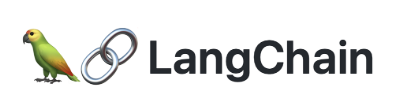

LangChain ist ein flexibles System, mit dem man LLMs zusammenstellen kann, indem man verschiedene Bausteine kombiniert.

LangGraph ist ein Orchestrierungs-Framework, das die Koordination und Steuerung von Workflows, die von Agenten ausgeführt werden, einfach und übersichtlich gestaltet. Es baut auf LangChain auf und erweitert dessen Funktionalitäten, um grafenbasierte Strukturen zu ermöglichen. Mit LangGraph können wir komplexe Abläufe, Entscheidungsbäume und Agenten-Interaktionen in Form eines Graphen modellieren und ausführen.  

LangGraph ermöglicht dabei die Erstellung von Graphen, die aus verschiedenen Knotenpunkten bestehen.  
Jeder Knotenpunkt kann bestimmte Aufgaben ausführen, etwa:  

- LLM-Aufrufe
- Code-Ausführung
- API-Anfragen
- Datenverarbeitung oder Zustandsverwaltung.  

Folgende Aufgabenstellung wollen wir mittels Agentensystem ausführen:  
- Ein Researcher soll zu einer Aufgabenstellung Themen erstellen
- Ein Summarizer soll die gesammelten Inhalte zusammenfassen
- Ein Tool soll die gesuchten Informationen aus dem Internet abfragen


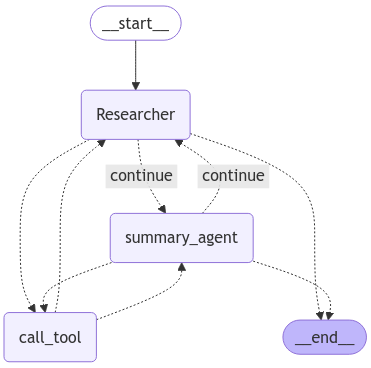

Graphen sind besonders geeignet, um Prozesse zu modellieren, bei denen:

- Sequenzielle Schritte erforderlich sind.
- Verzweigungen und Entscheidungen getroffen werden müssen.
- Ein Zustand zwischen verschiedenen Schritten erhalten und verändert werden soll.  

Der Unterschied zwischen der parallelen Tool-Nutzung in einem einfachen agentenbasierten LLM-Arbeitsablauf und der Nutzung von LangGraph-Agenten liegt vor allem in der Komplexität der Abläufe, der Kontrolle der Zustände und der Skalierbarkeit des Workflows.  
  
Agenten Frameworks sind also praktisch, um von zustandslosen Interaktionen mit LLMs zu einer zustandsorientierten zu kommen. Das bedeutet, dass das Modell nicht nur auf einzelne Prompts reagiert, sondern auch einen fortlaufenden Kontext und Zustand verwaltet. Mit zustandslos ist gemeint, dass jede Anfrage an das LLM unabhängig von vorherigen Anfragen ist (das LLM kennt also den vorerhigen Kontext nicht).   
Mithilfe von LangChain's ChatPromptTemplate wird eine Eingabeaufforderung definiert, die dynamisch Systemnachrichten und Toolnamen integriert. Platzhalter wie MessagesPlaceholder ermöglichen das Einfügen eines Nachrichtenverlaufs, wodurch der Agent flexibel auf Konversationen reagieren kann. Sollten z.B. Daten fehlen, stellt der Agent automatisch Rückfragen. LangGraph erfasst die Zustandsänderungen (z. B. START und END) und ermöglicht, dass der Agent Tools verwendet, die über llm.bind_tools eingebunden werden.  

Wir erstellen nun einen Multi-Agenten-Workflow mit LangGraph, LangChain und Groq, der eine LLm gestützte Recherche und Zusammenfassung durchführt.

In [22]:
from langchain_core.messages import (
    BaseMessage,
    HumanMessage,
    ToolMessage,
)
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

from langgraph.graph import END, StateGraph, START

def create_agent(llm, tools, system_message: str):
    """
    Erstellt einen Agenten.
    
    Parameter:
    - llm: Das Sprachmodell (Large Language Model), das verwendet wird.
    - tools: Eine Liste von Tools, die der Agent verwenden kann, um Aufgaben zu lösen.
    - system_message: Eine zusätzliche agentenspezifische Systemnachricht, die Anweisungen enthält.
    """
    # Definiere eine Eingabeaufforderung (Prompt), die die Rolle des Agenten beschreibt
    prompt = ChatPromptTemplate.from_messages(
        [
            (
                "system",
                "You are a helpful AI assistant, collaborating with other assistants."
                " Use the provided tools to progress towards answering the question."
                " If you are unable to fully answer, that's OK, another assistant with different tools "
                " will help where you left off. Execute what you can to make progress."
                " If you or any of the other assistants have the final answer or deliverable,"
                " prefix your response with FINAL ANSWER so the team knows to stop."
                " You have access to the following tools: {tool_names}.\n{system_message}",
            ),
            # Platzhalter für Nachrichtenverlauf (dynamische Einbindung von Nachrichten)
            MessagesPlaceholder(variable_name="messages"),
        ]
    )

    # Die Systemnachricht wird als Teil des Prompts gesetzt
    prompt = prompt.partial(system_message=system_message)

    # Fügt die Namen der verfügbaren Tools in die Eingabeaufforderung ein
    prompt = prompt.partial(tool_names=", ".join([tool.name for tool in tools]))

    # Verbindet das LLM mit den Tools und gib das konfigurierte Agentenobjekt zurück
    return prompt | llm.bind_tools(tools)


c:\Users\JAKO\dev\GenerativeKImitPython_Material\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Wir implementieren eine Suchfunktion, die mithilfe  DuckDuckGoSearchRun von LangChain Anfragen ausführt.

In [ ]:
from duckduckgo_search import DDGS
import json
from langchain_groq import ChatGroq
from langchain_core.tools import tool
from groq import Groq
import datetime

# API-Schlüssel für Groq, ersetzt durch deinen tatsächlichen Schlüssel
groq_api_key = "your-key"

# Initialisiere den Groq-Client mit dem API-Schlüssel
client = Groq(api_key=groq_api_key)

# Initialisiere das Groq-Modell (ChatGroq) mit spezifischen Parametern
llm = ChatGroq(
    model="llama3-8b-8192",  # Modellwahl: gemma2-9b-it vs mixtral-8x7b-32768 vs llama3-8b-8192
    temperature=0,               # Niedrige Temperatur für deterministische Antworten
    max_tokens=4000,              # Begrenzung der Token 100 vs 400
    timeout=None,                # Kein Timeout
    max_retries=2,               # Maximale Anzahl von Wiederholungen bei Fehlern 2 vs 
    api_key=groq_api_key         # API-Schlüssel für das Groq-Modell
)

# Definiere die DuckDuckGo-Suchfunktion als LangChain-Tool
@tool
def search(query: str) -> str:
    """
    Führt eine direkte Suche mit DuckDuckGo durch und gibt die relevanteste Antwort zurück.

    Parameter:
        query (str): Die Suchanfrage.

    Rückgabewert:
        str: Der relevanteste Treffer oder eine Fehlermeldung.
    """
    try:
        with DDGS() as ddgs:
            results = list(ddgs.text(query, max_results=5))  # Konvertiere Generator zu Liste
            if results:
                # Bevorzugt den "body" (Snippet), fällt zurück auf "title"
                answer = results[0].get("body") or results[0].get("title")
                return answer if answer else "Keine relevante Antwort gefunden."
            else:
                return "Keine Ergebnisse gefunden."
    except Exception as e:
        return f"Ein Fehler ist aufgetreten: {str(e)}"

# Füge die Suchfunktion zur Werkzeugliste hinzu
tools = [search]

# Beispielverwendung der Suchfunktion
if __name__ == "__main__":
    query = "Who won the 2025 federal election in Germany?"  # Beispiel-Suchanfrage
    search_result = search(query)             # Suche ausführen
    print("Suchergebnis:", search_result)     # Ausgabe des Ergebnisses
    # Erzeuge einen Zeitstempel und speichere das Ergebnis in einer TXT-Datei
    timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    filename = f"search_result_{timestamp}.txt"
    
    with open(filename, "w", encoding="utf-8") as file:
        file.write(search_result)
    
    print(f"Ergebnis wurde in {filename} gespeichert.")


C:\Users\jesko.rehberg\AppData\Local\Temp\ipykernel_4052\2296811266.py:54: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  search_result = search(query)             # Suche ausführen


Suchergebnis: 02/24/2025 February 24, 2025. Mainstream conservatives led by Friedrich Merz have won Germany's 2025 election. Here's a look in charts at the wins and losses, seats in parliament, possible ...
Ergebnis wurde in search_result_2025-02-25_15-25-17.txt gespeichert.


In [ ]:
# # Alternative, die anstatt duckduckgo eine dummy content verwendet
# from duckduckgo_search import DDGS
# import json
# from langchain_groq import ChatGroq
# from langchain_core.tools import tool
# from groq import Groq
# import datetime

# # API-Schlüssel für Groq, ersetzt durch deinen tatsächlichen Schlüssel
# groq_api_key = "your-key"

# # Initialisiere den Groq-Client mit dem API-Schlüssel
# client = Groq(api_key=groq_api_key)

# # Initialisiere das Groq-Modell (ChatGroq) mit spezifischen Parametern
# llm = ChatGroq(
#     model="mixtral-8x7b-32768",  # Modellwahl: gemma2-9b-it vs mixtral-8x7b-32768
#     temperature=0,               # Niedrige Temperatur für deterministische Antworten
#     max_tokens=4000,              # Begrenzung der Token 100 vs 400
#     timeout=None,                # Kein Timeout
#     max_retries=2,               # Maximale Anzahl von Wiederholungen bei Fehlern 2 vs 
#     api_key=groq_api_key         # API-Schlüssel für das Groq-Modell
# )

# # Definiere die DuckDuckGo-Suchfunktion als LangChain-Tool
# @tool
# def search(query: str) -> str:
#     """
#     Dummy search function that returns a predefined answer regarding AI trends in 2025.
    
#     Parameters:
#         query (str): The search query (ignored in this dummy implementation).
    
#     Returns:
#         str: A predefined answer about AI trends in 2025.
#     """
#     answer = """The Christian Democratic Union and the allied Christian Social Union secured the largest share of votes in the German federal election on Sunday, according to exit polls from German broadcaster ZDF.

# This puts the party’s lead candidate Friedrich Merz in prime position to take over from Olaf Scholz as chancellor of Europe’s largest economy.

# The CDU-CSU won 28.5% of votes, with the far-right AfD in second place with 20% and Scholz’s Social Democratic Party coming in third with 16.5%, according to ZDF exit polls data.

# “We have won it because the CDU and CSU worked well together and we prepared very very well for this election and also for taking over governing responsibility,” Merz said, according to a CNBC translation, extending thanks to CSU chief Markus Söder and other supporters. “It was a great campaign.”

# He acknowledged that the challenges would not be easy to tackle, noting it was now time for political groups to hold talks and set up a new government as soon as possible.

# “It is a bitter election result for the Social Democratic Party. It is also an election defeat, [and] I think that needs to be said once clearly, from the start, given a result like this,” Scholz said at the party’s headquarters, as he thanked campaigners and supporters. He said he took responsibility during the previous federal vote, when the SPD achieved a better performance and that “this time the election result is bad and therefore I also have responsibility for this election result.”

# Scholz also congratulated Merz and the CDU-CSU on their own voting outcome.

# The CDU and its regional sister party the Christian Social Union were topping the polls in the lead-up to the election, with support dipping slightly just ahead of the vote. The far-right AfD was polling in second place, followed by the SPD.

# This marked a drop in support for the SPD, which took the top spot during the 2021 election, followed by the CDU/CSU. The AfD clinched fourth place at the time.

# Germans cast two votes on Sunday, one to directly elect a member of parliament to represent their constituency and one for a party list. The second vote determined the proportional make-up of the German Parliament, the Bundestag, with parties sending their candidates to Berlin to ensure representation.

# Parties also must meet a 5% threshold to be able to garner seats in parliament. Crucially, the groups that tend to secure around this level of votes often become so-called kingmakers of coalition building after the election.

# A key focus around the election has been how smaller parties fare, which could impact both coalition building and the ability of the incoming government to reform constitutional rules, for example around spending and debt. They would need a two-thirds majority to do so.

# Observers were also closely watching the performance of the far-right AfD amid a broader rightward political shift across the Western world. The election comes at a tumultuous time for Germany, both politically and economically.

# The Sunday vote is only the fourth early election in the country’s history and took place after the former ruling coalition made up of the SPD, the Green party and the Free Democratic Party collapsed late last year, in another rarity for local politics. Deeply rooted long-term disagreements among about economic, fiscal and budget policies had led to the union’s effective break-up.

# Such policies will also be top of the agenda when it comes to the post-election coalition building process and then governance, especially due to the sluggish German economy, which contracted in both 2023 and 2024. Further concerns lie ahead, including a strong focus on exports, a housebuilding crisis and difficulties in the key auto sector.

# The new ruling coalition will also need to contend with a fierce domestic debate about migration, the rising popularity of the far right, and broader tensions between Europe and the U.S. as President Donald Trump advances his trade and Ukraine war policies in his second term."""

#     return answer
# # Füge die Suchfunktion zur Werkzeugliste hinzu
# tools = [search]

# # Beispielverwendung der Suchfunktion
# if __name__ == "__main__":
#     query = "Latest advancements in AI 2025"  # Beispiel-Suchanfrage
#     search_result = search(query)             # Suche ausführen
#     print("Suchergebnis:", search_result)     # Ausgabe des Ergebnisses
#     # Erzeuge einen Zeitstempel und speichere das Ergebnis in einer TXT-Datei
#     timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
#     filename = f"search_result_{timestamp}.txt"
    
#     with open(filename, "w", encoding="utf-8") as file:
#         file.write(search_result)
    
#     print(f"Ergebnis wurde in {filename} gespeichert.")



Suchergebnis: The Christian Democratic Union and the allied Christian Social Union secured the largest share of votes in the German federal election on Sunday, according to exit polls from German broadcaster ZDF.

This puts the party’s lead candidate Friedrich Merz in prime position to take over from Olaf Scholz as chancellor of Europe’s largest economy.

The CDU-CSU won 28.5% of votes, with the far-right AfD in second place with 20% and Scholz’s Social Democratic Party coming in third with 16.5%, according to ZDF exit polls data.

“We have won it because the CDU and CSU worked well together and we prepared very very well for this election and also for taking over governing responsibility,” Merz said, according to a CNBC translation, extending thanks to CSU chief Markus Söder and other supporters. “It was a great campaign.”

He acknowledged that the challenges would not be easy to tackle, noting it was now time for political groups to hold talks and set up a new government as soon as p

Alernative: Wikipedia anstatt DuckDuckGo

In [ ]:
# from langchain_groq import ChatGroq
# import json
# import wikipedia
# from langchain_core.tools import tool
# from groq import Groq

# # API-Schlüssel für Groq, ersetzt durch deinen tatsächlichen Schlüssel
# groq_api_key = "your-key"

# # Initialisiere den Groq-Client mit dem API-Schlüssel
# client = Groq(api_key=groq_api_key)

# # Initialisiere das Groq-Modell (ChatGroq) mit spezifischen Parametern
# llm = ChatGroq(
#     model="mixtral-8x7b-32768",  # Wähle ein Modell: z. B. "llama3-8b-8192" oder "mixtral-8x7b-32768"
#     temperature=0,               # Temperatur für die Ausgabe (niedrig = deterministischer)
#     max_tokens=100,             # Maximale Anzahl von Tokens (None = unbegrenzt)
#     timeout=None,                # Timeout für API-Aufrufe
#     max_retries=2,               # Maximale Anzahl von Wiederholungen bei Fehlern
#     api_key=groq_api_key         # API-Schlüssel für das Groq-Modell
# )

# # Definiere die Suchfunktion mit Wikipedia
# @tool
# def search(query: str) -> str:
#     """
#     Führt eine Suche mit Wikipedia durch.

#     Parameter:
#         query (str): Die Suchanfrage, die an Wikipedia gesendet wird.

#     Rückgabewert:
#         str: Ein JSON-String, der entweder die Suchergebnisse oder eine Fehlermeldung enthält.
#     """
#     try:
#         # Hole die Zusammenfassung der Seite mit der angegebenen Anfrage
#         summary = wikipedia.summary(query, sentences=3)
#         # Rückgabe des Ergebnisses als JSON-String
#         return json.dumps({"result": summary})
#     except wikipedia.exceptions.DisambiguationError as e:
#         return json.dumps({"error": f"DisambiguationError: {str(e)}"})
#     except wikipedia.exceptions.PageError:
#         return json.dumps({"error": "No Wikipedia page found."})
#     except Exception as e:
#         # Im Fehlerfall wird eine Fehlermeldung als JSON zurückgegeben
#         return json.dumps({"error": f"An error occurred: {str(e)}"})

# # Füge die Suchfunktion zur Werkzeugliste hinzu
# tools = [search]

# # Beispielverwendung der Suchfunktion
# if __name__ == "__main__":
#     query = "Christian Democratic Union"  # Die Suchanfrage
#     search_result = search(query)            # Führe die Suche aus
#     print(search_result)                     # Drucke das Suchergebnis


Definition des Zustands

In [47]:
import operator  # Import für die Verwendung von Operatoren, z. B. zur Verkettung von Listen
from typing import Annotated, Sequence  # Typannotationen zur Definition von Datentypen
from typing_extensions import TypedDict  # TypedDict zur Erstellung von typisierten Dictionaries

from langchain_groq import ChatGroq  # Import des ChatGroq-Modells für den Einsatz von KI-Agenten

# Diese Klasse definiert das Objekt, das zwischen den Knoten im Graphen ausgetauscht wird.
# Jeder Knoten im Graph repräsentiert einen Agenten oder ein Tool, das Teil des Workflows ist.
class AgentState(TypedDict):
    """
    AgentState beschreibt den Zustand, der zwischen verschiedenen Knoten eines Graphen 
    weitergegeben wird. Dies umfasst Nachrichten und den Absender der Nachricht.
    """
    # Die Nachrichten, die als Sequenz zwischen Knoten weitergegeben werden.
    # Annotated erlaubt die Angabe zusätzlicher Informationen (z. B. Operator zur Verkettung).
    messages: Annotated[Sequence[BaseMessage], operator.add]
    
    # Der Absender der Nachrichten (z. B. der Name des Agenten oder Tools, das die Nachricht gesendet hat)
    sender: str


Sobald das definiert ist, können wir unsere Agentenknoten wie unten gezeigt zusammenstellen.  
Der Workflow-Ablauf ist wie folgt:  
- Startet mit einer Benutzeranfrage 
- Der Researcher-Agent sucht zunächst Informationen
- Der Summary-Agent fasst die Ergebnisse zusammen  
Zwischen den Agenten erfolgen Werkzeugaufrufe und Informationsaustausch

In [ ]:
import functools  # Import für die Verwendung von functools.partial, um Funktionen teilweise zu binden

from langchain_core.messages import AIMessage  # Import für die AIMessage-Klasse, um KI-generierte Nachrichten zu erstellen

# Hilfsfunktion, um einen Knoten für einen bestimmten Agenten zu erstellen
def agent_node(state, agent, name):
    """
    Erstellt einen Knoten für den angegebenen Agenten und verarbeitet den aktuellen Zustand.
    
    Parameter:
        state: Der aktuelle Zustand, der vom Agenten verarbeitet wird.
        agent: Der Agent, der den Zustand verarbeitet.
        name: Der Name des Agenten (z. B. für die Sender-Identifikation).
    
    Rückgabewert:
        dict: Enthält die generierten Nachrichten und den Namen des Senders.
    """
    # Agent wird ausgeführt und gibt ein Ergebnis zurück
    result = agent.invoke(state)
    
    # Konvertiere die Ausgabe des Agenten in ein passendes Format
    if isinstance(result, ToolMessage):
        pass  # ToolMessage wird unverändert übernommen (kann hier erweitert werden, falls nötig)
    else:
        # Konvertiere die Ausgabe in ein AIMessage-Objekt und füge den Sendernamen hinzu
        result = AIMessage(**result.model_dump(exclude={"type", "name"}), name=name)
    
    # Rückgabe des neuen Zustands mit Nachrichten und Sender
    return {
        "messages": [result],  # Die generierte Nachricht wird angefügt
        # Da der Workflow streng definiert ist, wird der Sender festgehalten,
        # um zu wissen, wer als nächstes die Nachricht verarbeiten soll.
        "sender": name,
    }

# Spezifikation des Modells, das von den Agenten verwendet wird
llm = ChatGroq(
    model="llama3-8b-8192",  # llama-3.3-70b-versatile scheint für tool use finegetuned zu sein vs "mixtral-8x7b-32768" vs "gemma2-9b-it" vs "llama3-8b-8192"
    api_key=groq_api_key,
    max_tokens=4000,        
)

# Forschungs-Agent und zugehöriger Knoten
research_agent = create_agent(
    llm,  # Das Modell, das der Agent verwendet
    tools,  # Die verfügbaren Tools für den Agenten
    system_message="You should provide accurate data for the summary_agent to use.",  # Systemnachricht, die die Rolle beschreibt
)
# Erstelle einen Knoten für den Forschungs-Agenten
research_node = functools.partial(agent_node, agent=research_agent, name="Researcher")


summary_agent_llm = ChatGroq(
    model="llama3-8b-8192",  # llama-3.3-70b-versatile scheint für tool use finegetuned zu sein vs "mixtral-8x7b-32768" vs "gemma2-9b-it" vs "llama3-8b-8192"
    api_key=groq_api_key,
    max_tokens=4000,        
)

# Zusammenfassungs-Agent (Summary Agent) und zugehöriger Knoten
summary_agent = create_agent(
    llm,  # Das Modell, das der Agent verwendet
    tools,  # Die verfügbaren Tools für den Agenten
    system_message="You should summarize data provided by the research_agent.",  # Systemnachricht für die Rolle des Agenten
)
# Erstelle einen Knoten für den Zusammenfassungs-Agenten
chart_node = functools.partial(agent_node, agent=summary_agent, name="summary_agent")

Wir definieren zwei Bereiche: den zusammenfassenden Agenten und den Forschungsagenten.

In [ ]:
from langgraph.prebuilt import ToolNode  # Import von ToolNode, um Werkzeuge in den Graph zu integrieren

tools = [search]  # Hier wird die zuvor definierte Suchfunktion `search` als Werkzeug hinzugefügt

# Erstelle einen Tool-Knoten für den Workflow
tool_node = ToolNode(tools)
"""
ToolNode ist ein vorgefertigter Knoten aus LangGraph, der die Integration von Tools ermöglicht.
Dieser Knoten kann im Graph verwendet werden, um die definierten Werkzeuge auszuführen.
"""

'\nToolNode ist ein vorgefertigter Knoten aus LangGraph, der die Integration von Tools ermöglicht.\nDieser Knoten kann im Graph verwendet werden, um die definierten Werkzeuge auszuführen.\n'

Der nächste Code beinhaltet die Edge Logic, mit der wir auf der Grundlage der Ergebnisse der Agenten entscheiden wollen, was zu tun ist.  
Die Entscheidung darüber wird in der router() Funktion getroffen  


In [ ]:
# Jeder Agent kann entscheiden, den Prozess zu beenden
from typing import Literal  # Import zur Definition von Literal-Typen für Rückgabewerte, Stichwort: Typensicherheit


def router(state) -> Literal["call_tool", "__end__", "continue"]:
    """
    Router-Funktion, die den nächsten Schritt im Workflow bestimmt.
    
    Parameter:
        state (dict): Der aktuelle Zustand, der Nachrichten und weitere Informationen enthält.
    
    Rückgabewert:
        Literal: Ein String, der den nächsten Schritt angibt:
        - "call_tool": Ein Werkzeug soll aufgerufen werden.
        - "__end__": Der Workflow wird beendet.
        - "continue": Der Workflow wird fortgesetzt.
    """
    # Nachrichten aus dem aktuellen Zustand abrufen
    messages = state["messages"]
    # Die letzte Nachricht im Nachrichtenverlauf
    last_message = messages[-1]
    
    # Prüfen, ob die letzte Nachricht ein Werkzeug aufrufen möchte
    if last_message.tool_calls:
        # Der vorherige Agent möchte ein Werkzeug ausführen
        return "call_tool"
    
    # Prüfen, ob "FINAL ANSWER" in der Nachricht vorhanden ist
    if "FINAL ANSWER" in last_message.content:
        # Ein Agent hat entschieden, dass die Arbeit abgeschlossen ist
        return "__end__"
    
    # Standardmäßig wird der Workflow fortgesetzt
    return "continue"


D.h., die Die Entscheidung basiert auf drei Kriterien:  

1. Tool-Aufruf:

- Wenn die letzte Nachricht tool_calls enthält, wird "call_tool" zurückgegeben
- Der Agent benötigt weitere Informationen und ruft ein Werkzeug auf


2. Finale Antwort:

- Wenn "FINAL ANSWER" im Inhalt der Nachricht steht, wird der Workflow beendet
- Dies ist ein expliziter Mechanismus, den die Systemnachricht vorgibt


3. Standardfall (Fortsetzung):

- Wenn keine der obigen Bedingungen zutrifft, wird "continue" zurückgegeben
- Der Workflow setzt sich fort, typischerweise zum nächsten Agenten  

Als Nächstes definiert unser Code den StateGraph, der für die Kompilierung von zentraler Bedeutung ist.

In [51]:
# Erstelle einen Workflow-Graphen basierend auf AgentState
workflow = StateGraph(AgentState)

workflow.add_node("Researcher", research_node)  # Knoten für den Researcher-Agent
workflow.add_node("summary_agent", chart_node)  # Knoten für den Zusammenfassungs-Agent
workflow.add_node("call_tool", tool_node)  # Knoten für Werkzeugaufrufe

# Füge bedingte Übergänge (Conditional Edges) zwischen den Knoten hinzu
workflow.add_conditional_edges(
    "Researcher",  # Ausgangspunkt: Researcher-Agent
    router,  # Router-Funktion zur Bestimmung des nächsten Schrittes
    {
        "continue": "summary_agent",  # Fortsetzen: Gehe zum Zusammenfassungs-Agent
        "call_tool": "call_tool",  # Werkzeug aufrufen: Gehe zum Tool-Knoten
        "__end__": END,  # Beenden: Workflow beenden
    },
)
workflow.add_conditional_edges(
    "summary_agent",  # Ausgangspunkt: Zusammenfassungs-Agent
    router,  # Router-Funktion zur Bestimmung des nächsten Schrittes
    {
        "continue": "Researcher",  # Fortsetzen: Gehe zurück zum Researcher-Agent
        "call_tool": "call_tool",  # Werkzeug aufrufen: Gehe zum Tool-Knoten
        "__end__": END,  # Beenden: Workflow beenden
    },
)

# Bedingte Übergänge für den Werkzeug-Knoten
workflow.add_conditional_edges(
    "call_tool",
    # Jeder Agent aktualisiert das Feld 'sender',
    # der Werkzeug-Knoten tut dies jedoch nicht. Dadurch
    # wird die Nachricht zum ursprünglichen Agenten zurückgeleitet,
    # der das Werkzeug aufgerufen hat.
    lambda x: x["sender"],  # Basierend auf dem Feld 'sender' wird der nächste Schritt bestimmt
    {
        "Researcher": "Researcher",  # Zurück zum Researcher-Agent
        "summary_agent": "summary_agent",  # Zurück zum Zusammenfassungs-Agent
    },
)

# Füge eine Kante hinzu, um den Workflow vom Startpunkt aus zu beginnen
workflow.add_edge(START, "Researcher")  # Der Workflow startet beim Researcher-Agent

# Kompiliere den Workflow-Graphen
graph = workflow.compile()  # Bereite den Graphen zur Ausführung vor


Der Graph lässt sich auch visualisieren.

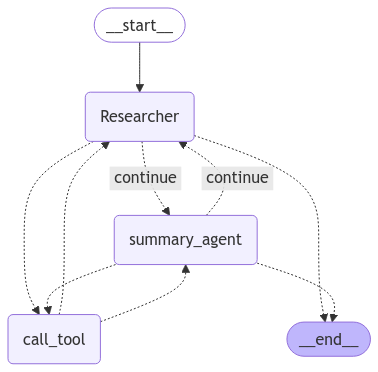

'\n- `graph.get_graph()`: Ruft den internen Graphen ab, der im Workflow definiert wurde.\n- `draw_mermaid_png()`: Wandelt den Graphen in eine PNG-Darstellung um, basierend auf Mermaid.js, einem Tool zur Diagrammerstellung.\n- `display()`: Zeigt die PNG-Datei im Jupyter-Notebook an.\n'

In [52]:
from IPython.display import Image, display  # Importiert Funktionen zur Anzeige von Bildern in Jupyter-Notebooks

# Zeige den Workflow-Graphen als Bild an
display(
    Image(
        graph.get_graph().draw_mermaid_png()  # Erstellt eine PNG-Darstellung des Graphen mit Mermaid.js
    )
)
"""
- `graph.get_graph()`: Ruft den internen Graphen ab, der im Workflow definiert wurde.
- `draw_mermaid_png()`: Wandelt den Graphen in eine PNG-Darstellung um, basierend auf Mermaid.js, einem Tool zur Diagrammerstellung.
- `display()`: Zeigt die PNG-Datei im Jupyter-Notebook an.
"""


Aufruf des Agenten

In [55]:
import time  # Import für die Verwendung von time.sleep zur Verzögerung der Ausgabe
# Starte den Workflow-Graphen und führe die Verarbeitung schrittweise aus
events = graph.stream(
    {
        # Initialer Zustand des Graphen mit einer Nachricht vom Nutzer (HumanMessage)
        "messages": [
            HumanMessage(
                content="Generate the latest results on who won the 2025 federal election in Germany , and summarize a detailed background report on facts that led to this result."
                #content="Generate the latest results on who won the 2025 federal election in Germany , and summarize a report on the latest results in the field."
            )
        ],
    },
    # Maximale Anzahl von Schritten, die im Graphen durchgeführt werden dürfen
    {"recursion_limit": 12},  # Legt ein Limit für die Rekursionstiefe fest, um Endlosschleifen zu vermeiden
)


# Öffne die Logdatei im Schreibmodus (dies wird AgentLog.txt im aktuellen Verzeichnis erstellen oder überschreiben)
with open("AgentLog.txt", "w", encoding="utf-8") as logfile:
    # Iteriere über die Ereignisse (Events), die während der Graphenverarbeitung generiert werden
    for s in events:
        # Ausgabe in der Konsole
        print(s)
        print("----")
        # Logge die Ausgabe in die Datei
        logfile.write(str(s) + "\n")
        logfile.write("----\n")

{'Researcher': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_q6kr', 'function': {'arguments': '{"query":"latest results on who won the 2025 federal election in Germany"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 122, 'prompt_tokens': 1087, 'total_tokens': 1209, 'completion_time': 0.101666667, 'prompt_time': 0.154593035, 'queue_time': 0.254871504, 'total_time': 0.256259702}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_179b0f92c9', 'finish_reason': 'tool_calls', 'logprobs': None}, name='Researcher', id='run-9ea9b379-25c7-4dee-9800-b290a1d03fad-0', tool_calls=[{'name': 'search', 'args': {'query': 'latest results on who won the 2025 federal election in Germany'}, 'id': 'call_q6kr', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1087, 'output_tokens': 122, 'total_tokens': 1209})], 'sender': 'Researcher'}}
----
{'call_tool': {'messages': [ToolMessage(content='The Christian Dem

GraphRecursionError: Recursion limit of 12 reached without hitting a stop condition. You can increase the limit by setting the `recursion_limit` config key.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/GRAPH_RECURSION_LIMIT

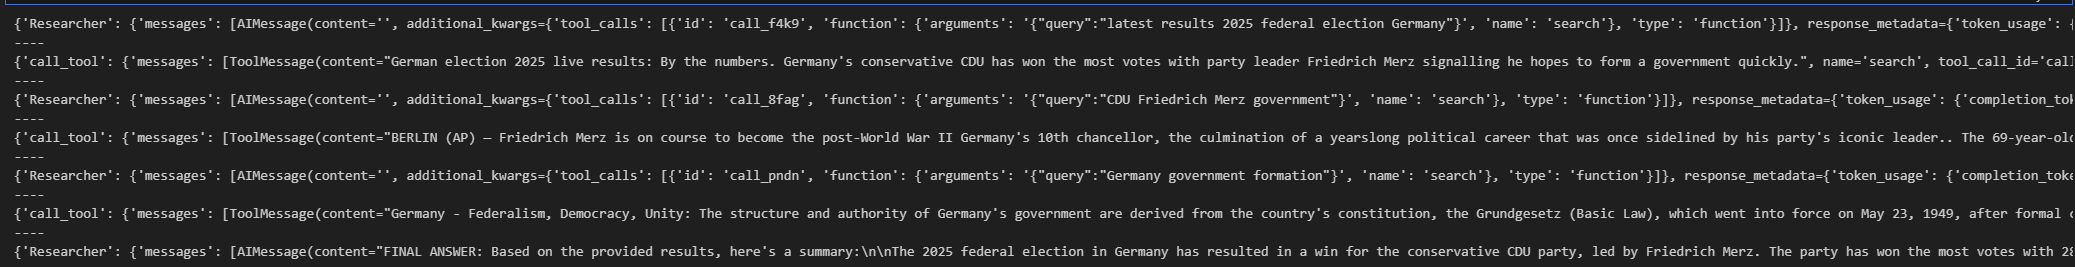

Für welche Arten von Arbeiten haltet Ihr Agentensysteme für sinnvoll?  
Bei welchen als eher problematisch?  

# Agentenbasierte Artikelverfassung, by Stanford

https://storm.genie.stanford.edu/  
STORM: Synthesis of Topic Outlines through Retrieval and Multi-perspective Question Asking  
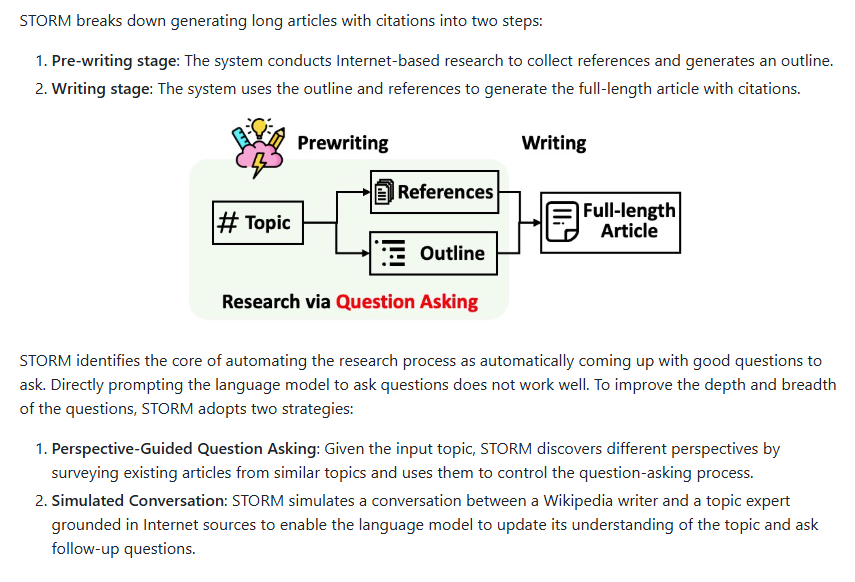  


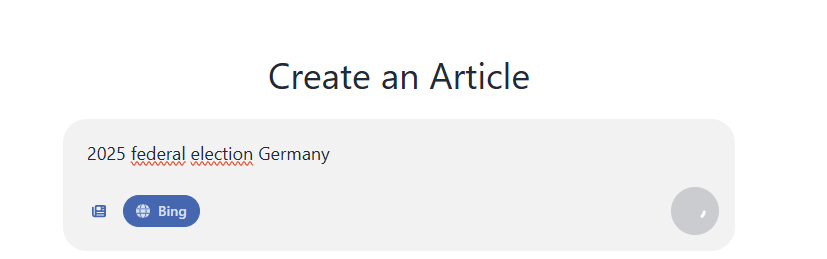  

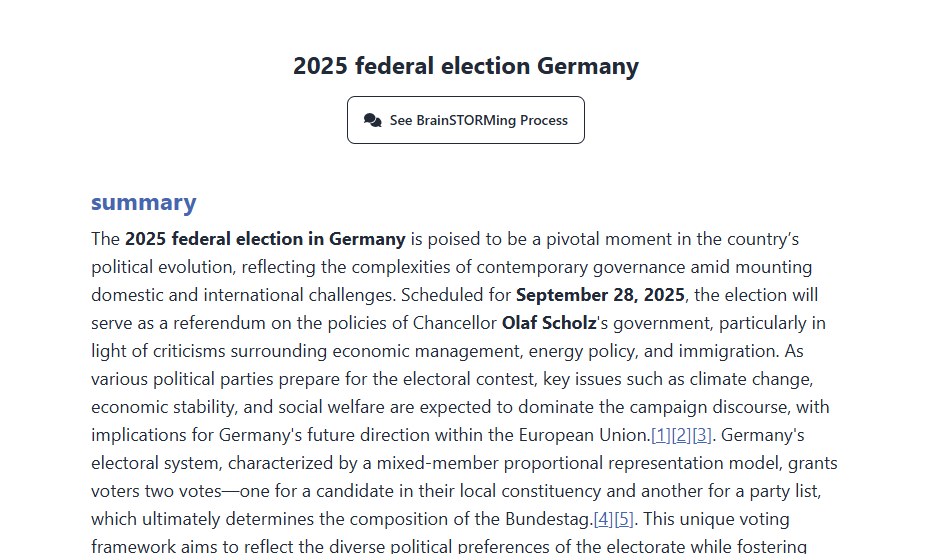

# Agentenbasierte Artikelverfassung Podcast, by Google

https://notebooklm.google/  

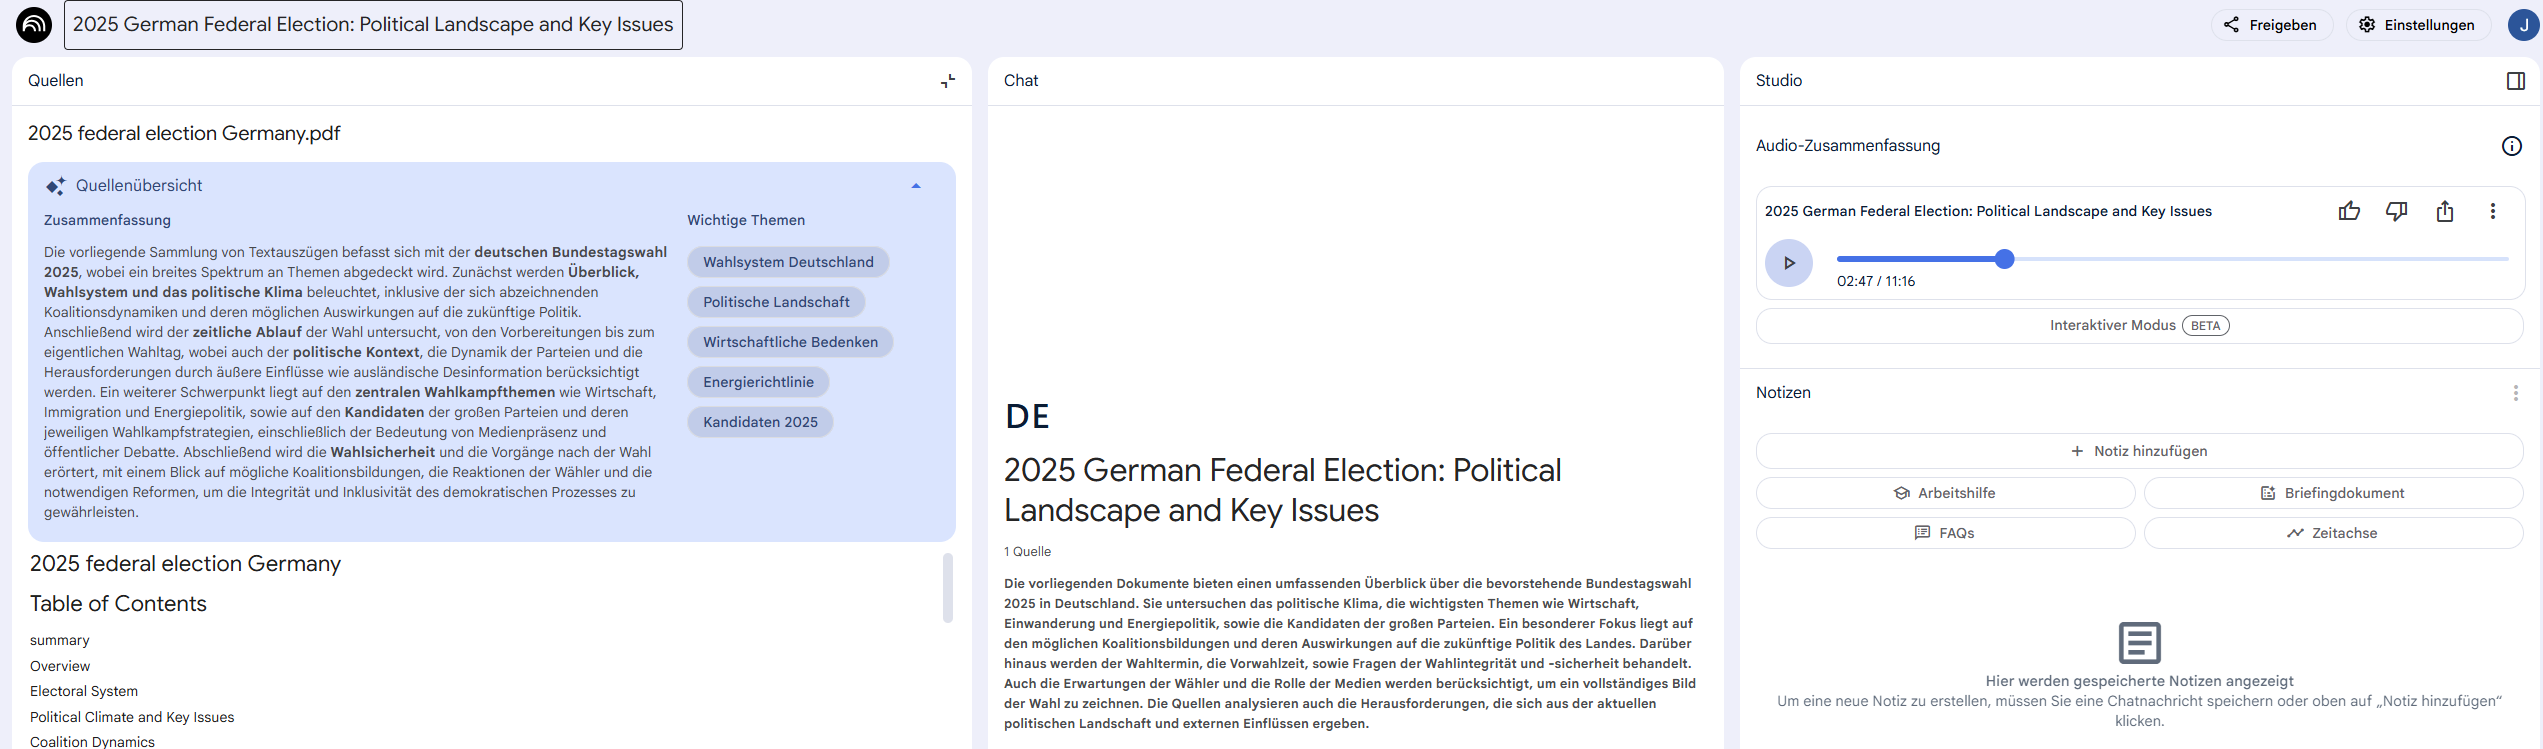

# Pydantic (Optional)

Tool Use with Structured Outputs: Warum Typensicherheit wichtig ist

Pydantic stellt sicher, dass die Ausgabe des LLMs einer fest definierten Struktur entspricht. So werden wir gleich erzwingen, dass die Antwort Felder wie location, temperature und condition enthält, wodurch das Fehlerrisiko verringert wird.
- Ohne Pydantic könnte der LLM-Output unstrukturiert, fehlerhaft oder unvollständig sein.
- Pydantic überprüft, ob die ausgegebenen Daten alle notwendigen Felder haben und ob sie den korrekten Datentypen entsprechen (z.B. int für Temperatur).

Pydantic geht über eine reine "Überwachung" hinaus, da es die gelieferten Rohdaten aktiv in die benötigte Form bringt:
- Wenn die Antwort des LLMs z.B. JSON ist und leicht abweicht (z.B. temperature="22" statt temperature=22), versucht Pydantic, die Daten zu korrigieren.
- Es wandelt die Eingabedaten (sofern möglich) in die passenden Python-Datentypen um, z.B. Strings zu Integers oder Dictionaries zu Klasseninstanzen.
- Falls die Umwandlung fehlschlägt, wird ein Fehler geworfen, sodass der Entwickler das Problem identifizieren kann

In [42]:
import instructor  # Instructor-Bibliothek zur Integration von Pydantic-Modellen mit LLM-Clients
from pydantic import BaseModel, Field  # Pydantic wird verwendet, um Datenmodelle zu definieren und zu validieren
from groq import Groq  # Groq-Client für LLM-API-Interaktionen
import json  # Zum Formatieren der Ausgabe

# Definition des Tool-Schemas
# Hier wird beschrieben, welche Parameter das Tool akzeptiert und wofür es verwendet wird.
tool_schema = {
    "name": "get_weather_info",  # Name des Tools
    "description": "Get the weather information for any location.",  # Beschreibung des Tools
    "parameters": {  # Definiert die Parameter, die das Tool benötigt
        "type": "object",
        "properties": {
            "location": {  # Der Parameter 'location'
                "type": "string",  # Typ des Parameters: String
                "description": "The location for which we want to get the weather information (e.g., Hamburg)"  # Beschreibung des Parameters
            }
        },
        "required": ["location"]  # Der Parameter 'location' ist verpflichtend
    }
}

# Definition des Pydantic-Modells für den Tool-Aufruf
# Dieses Modell stellt sicher, dass die Daten des Tools einer festen Struktur folgen.
class ToolCall(BaseModel):
    input_text: str = Field(description="The user's input text")  # Eingabetext des Benutzers
    tool_name: str = Field(description="The name of the tool to call")  # Name des aufgerufenen Tools
    tool_parameters: str = Field(description="JSON string of tool parameters")  # Parameter des Tools als JSON-String

Dieser Code definiert Pydantic-Modelle, um die LLM-Antworten (Tool-Aufrufe und Wetterdaten) zu validieren und strukturiert zu verarbeiten.   
Eine Konversation wird initiiert, bei der das LLM feststellt, welche Tools (z.B. `get_weather_info`) aufgerufen werden müssen.   
Die Ergebnisse der Tools werden simuliert, formatiert und abschließend in einer strukturierten Ausgabe zusammengefasst und angezeigt.

In [43]:
# Definition des Pydantic-Modells für die API-Antwort
# Enthält eine Liste von Tool-Aufrufen (ToolCall)
class ResponseModel(BaseModel):
    tool_calls: list[ToolCall]  # Liste von Tool-Aufrufen

# Definition des Pydantic-Modells für die formatierten Antworten
class WeatherResponse(BaseModel):
    location: str = Field(description="The name of the location")
    temperature: int = Field(description="The temperature in Celsius")
    condition: str = Field(description="The weather condition, e.g., sunny or rainy")

    def __str__(self):
        return f"The temperature in {self.location} is {self.temperature}°C and it's {self.condition}."

# Patch des Groq-Clients mit der Instructor-Bibliothek
# Dies sorgt dafür, dass die API-Antworten automatisch in die definierten Pydantic-Modelle umgewandelt werden.
client = instructor.from_groq(Groq(api_key=groq_api_key), mode=instructor.Mode.JSON)

def run_conversation(user_prompt):
    # Erstellen der Nachrichten für die Konversation
    messages = [
        {
            "role": "system",  # Systemnachricht zur Definition der Assistentenrolle
            "content": f"You are an assistant that can use tools. You have access to the following tool: {tool_schema}"  # Tool-Beschreibung
        },
        {
            "role": "user",  # Benutzernachricht
            "content": user_prompt,  # Eingabetext des Benutzers
        }
    ]

    # Aufruf der Groq-API zur Erstellung einer Antwort
    response = client.chat.completions.create(
        model= "llama3-70b-8192", # "llama-3.1-70b-versatile",  # Verwendetes LLM-Modell
        response_model=ResponseModel,  # Pydantic-Modell zur Validierung der Antwort
        messages=messages,  # Nachrichtenverlauf
        temperature=0.7,  # Temperatur zur Steuerung der Kreativität der Antworten
        max_tokens=1000,  # Maximale Anzahl der Tokens in der Antwort
    )

    return response.tool_calls  # Gibt die Liste der Tool-Aufrufe zurück

def call_tool_and_get_response(tool_name, tool_parameters):
    # Mock-Funktion zur Simulation der Tool-Ausgabe
    # In einer realen Umgebung könnte hier z.B. ein API-Aufruf erfolgen.
    if tool_name == "get_weather_info":
        params = json.loads(tool_parameters)  # Parameter als JSON parsen
        location = params.get("location", "Unknown")
        # Beispielwerte für die Wetterdaten
        mock_weather = {
            "Hamburg": WeatherResponse(location="Hamburg", temperature=22, condition="Sunny"),
            "Berlin": WeatherResponse(location="Berlin", temperature=18, condition="Rainy"),
            "San Francisco": WeatherResponse(location="Kiel", temperature=20, condition="Foggy")
        }
        return mock_weather.get(location, f"No weather data for {location}")
    return "Tool not implemented."

# Beispiel zur Verwendung der Funktion
user_prompt = "What's the weather like in Hamburg and Berlin?"  

# Die Funktion wird ausgeführt und die Liste der Tool-Aufrufe wird zurückgegeben
tool_calls = run_conversation(user_prompt)

# Ausgabe der Tool-Aufrufe und der Tool-Ergebnisse
responses = []
for call in tool_calls:
    print(f"Input: {call.input_text}")  # Zeigt den Eingabetext des Benutzers
    print(f"Tool: {call.tool_name}")  # Zeigt den Namen des aufgerufenen Tools
    print(f"Parameters: {call.tool_parameters}")  # Zeigt die Parameter des Tools
    
    # Rufe das Tool auf und erhalte die Ausgabe
    tool_response = call_tool_and_get_response(call.tool_name, call.tool_parameters)
    print(f"Response: {tool_response}")  # Zeigt die Antwort des Tools
    responses.append(tool_response)

# Ausgabe der formatierten Liste
print("\nFormatted Output:")
for idx, response in enumerate(responses, start=1):
    print(f"{idx}. {response}")

Input: What's the weather like in Hamburg and Berlin?
Tool: get_weather_info
Parameters: {"location":"Hamburg"}
Response: The temperature in Hamburg is 22°C and it's Sunny.
Input: What's the weather like in Hamburg and Berlin?
Tool: get_weather_info
Parameters: {"location":"Berlin"}
Response: The temperature in Berlin is 18°C and it's Rainy.

Formatted Output:
1. The temperature in Hamburg is 22°C and it's Sunny.
2. The temperature in Berlin is 18°C and it's Rainy.


Anbei der komplette Code in einer Zelle

In [44]:
import instructor  # Instructor-Bibliothek zur Integration von Pydantic-Modellen mit LLM-Clients
from pydantic import BaseModel, Field  # Pydantic wird verwendet, um Datenmodelle zu definieren und zu validieren
from groq import Groq  # Groq-Client für LLM-API-Interaktionen
import json  # Zum Formatieren der Ausgabe

# Definition des Tool-Schemas
# Hier wird beschrieben, welche Parameter das Tool akzeptiert und wofür es verwendet wird.
tool_schema = {
    "name": "get_weather_info",  # Name des Tools
    "description": "Get the weather information for any location.",  # Beschreibung des Tools
    "parameters": {  # Definiert die Parameter, die das Tool benötigt
        "type": "object",
        "properties": {
            "location": {  # Der Parameter 'location'
                "type": "string",  # Typ des Parameters: String
                "description": "The location for which we want to get the weather information (e.g., Hamburg)"  # Beschreibung des Parameters
            }
        },
        "required": ["location"]  # Der Parameter 'location' ist verpflichtend
    }
}

# Definition des Pydantic-Modells für den Tool-Aufruf
# Dieses Modell stellt sicher, dass die Daten des Tools einer festen Struktur folgen.
class ToolCall(BaseModel):
    input_text: str = Field(description="The user's input text")  # Eingabetext des Benutzers
    tool_name: str = Field(description="The name of the tool to call")  # Name des aufgerufenen Tools
    tool_parameters: str = Field(description="JSON string of tool parameters")  # Parameter des Tools als JSON-String

# Definition des Pydantic-Modells für die API-Antwort
# Enthält eine Liste von Tool-Aufrufen (ToolCall)
class ResponseModel(BaseModel):
    tool_calls: list[ToolCall]  # Liste von Tool-Aufrufen

# Definition des Pydantic-Modells für die formatierten Antworten
class WeatherResponse(BaseModel):
    location: str = Field(description="The name of the location")
    temperature: int = Field(description="The temperature in Celsius")
    condition: str = Field(description="The weather condition, e.g., sunny or rainy")

    def __str__(self):
        return f"The temperature in {self.location} is {self.temperature}°C and it's {self.condition}."

# Patch des Groq-Clients mit der Instructor-Bibliothek
# Dies sorgt dafür, dass die API-Antworten automatisch in die definierten Pydantic-Modelle umgewandelt werden.
client = instructor.from_groq(Groq(api_key=groq_api_key), mode=instructor.Mode.JSON)

def run_conversation(user_prompt):
    # Erstellen der Nachrichten für die Konversation
    messages = [
        {
            "role": "system",  # Systemnachricht zur Definition der Assistentenrolle
            "content": f"You are an assistant that can use tools. You have access to the following tool: {tool_schema}"  # Tool-Beschreibung
        },
        {
            "role": "user",  # Benutzernachricht
            "content": user_prompt,  # Eingabetext des Benutzers
        }
    ]

    # Aufruf der Groq-API zur Erstellung einer Antwort
    response = client.chat.completions.create(
        model="llama3-70b-8192", # "llama-3.1-70b-versatile",  # Verwendetes LLM-Modell
        response_model=ResponseModel,  # Pydantic-Modell zur Validierung der Antwort
        messages=messages,  # Nachrichtenverlauf
        temperature=0.7,  # Temperatur zur Steuerung der Kreativität der Antworten
        max_tokens=1000,  # Maximale Anzahl der Tokens in der Antwort
    )

    return response.tool_calls  # Gibt die Liste der Tool-Aufrufe zurück

def call_tool_and_get_response(tool_name, tool_parameters):
    # Mock-Funktion zur Simulation der Tool-Ausgabe
    # In einer realen Umgebung würde hier ein API-Aufruf oder eine andere Logik implementiert werden.
    if tool_name == "get_weather_info":
        params = json.loads(tool_parameters)  # Parameter als JSON parsen
        location = params.get("location", "Unknown")
        # Beispielwerte für die Wetterdaten
        mock_weather = {
            "Hamburg": WeatherResponse(location="Hamburg", temperature=22, condition="Sunny"),
            "Berlin": WeatherResponse(location="Berlin", temperature=18, condition="Rainy"),
            "San Francisco": WeatherResponse(location="Kiel", temperature=20, condition="Foggy")
        }
        return mock_weather.get(location, f"No weather data for {location}")
    return "Tool not implemented."

# Beispiel zur Verwendung der Funktion
user_prompt = "What's the weather like in Hamburg and Berlin?"  # Eingabe des Benutzers

# Die Funktion wird ausgeführt und die Liste der Tool-Aufrufe wird zurückgegeben
tool_calls = run_conversation(user_prompt)

# Ausgabe der Tool-Aufrufe und der Tool-Ergebnisse
responses = []
for call in tool_calls:
    print(f"Input: {call.input_text}")  # Zeigt den Eingabetext des Benutzers
    print(f"Tool: {call.tool_name}")  # Zeigt den Namen des aufgerufenen Tools
    print(f"Parameters: {call.tool_parameters}")  # Zeigt die Parameter des Tools
    
    # Rufe das Tool auf und erhalte die Ausgabe
    tool_response = call_tool_and_get_response(call.tool_name, call.tool_parameters)
    print(f"Response: {tool_response}")  # Zeigt die Antwort des Tools
    responses.append(tool_response)

# Ausgabe der formatierten Liste
print("\nFormatted Output:")
for idx, response in enumerate(responses, start=1):
    print(f"{idx}. {response}")


Input: What's the weather like in Hamburg and Berlin?
Tool: get_weather_info
Parameters: {"location":"Hamburg"}
Response: The temperature in Hamburg is 22°C and it's Sunny.
Input: What's the weather like in Hamburg and Berlin?
Tool: get_weather_info
Parameters: {"location":"Berlin"}
Response: The temperature in Berlin is 18°C and it's Rainy.

Formatted Output:
1. The temperature in Hamburg is 22°C and it's Sunny.
2. The temperature in Berlin is 18°C and it's Rainy.
